# House Price Prediction Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the training_set.csv 

In [2]:
import pandas as pd
df = pd.read_csv('training_set.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check Missing values in dataframe

In [6]:
s = df.isna().sum()
s

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# EDA (Explatory Data Analysis)

In [8]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [9]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Descriptive anlaytics

In [11]:
df[con].describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [12]:
df[cat].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

### Univariate analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

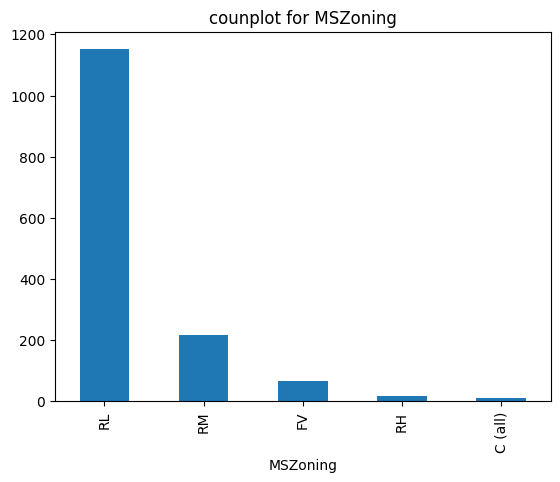

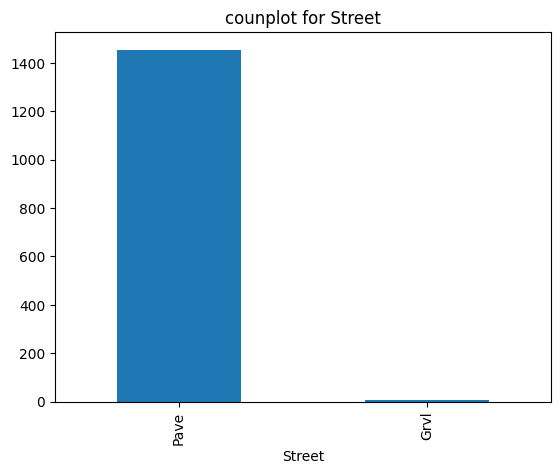

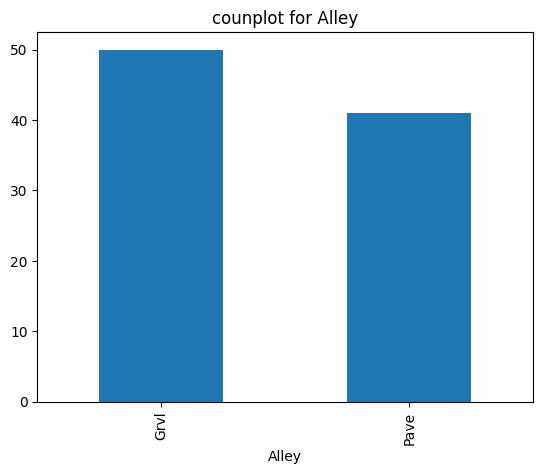

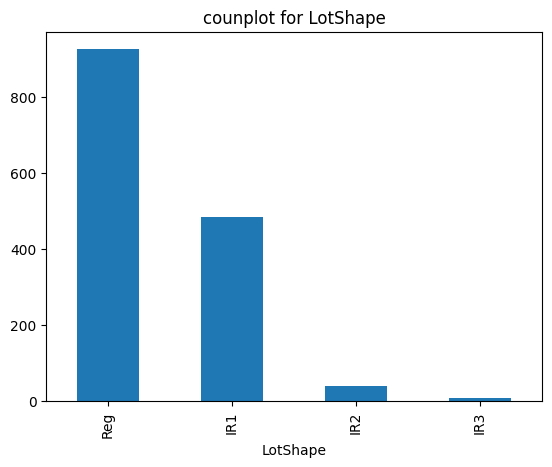

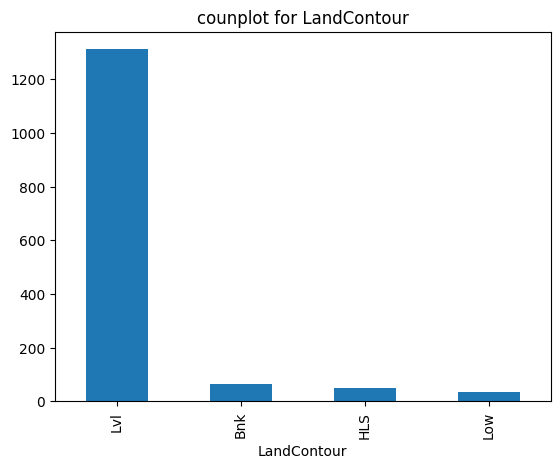

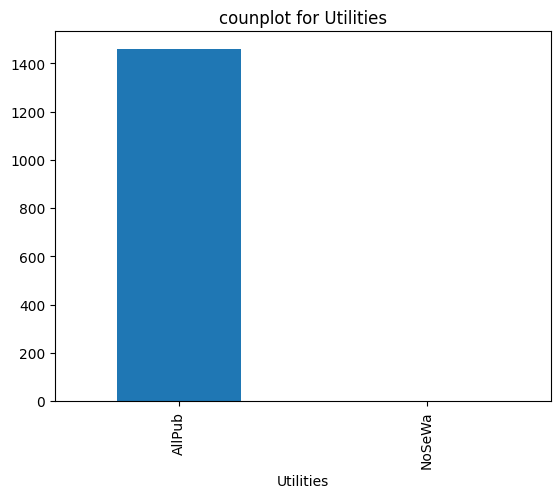

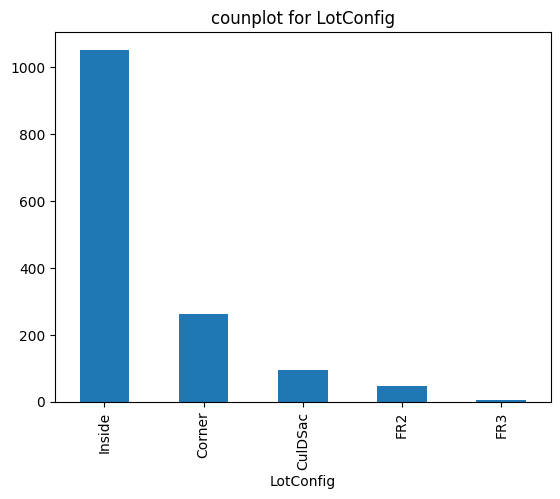

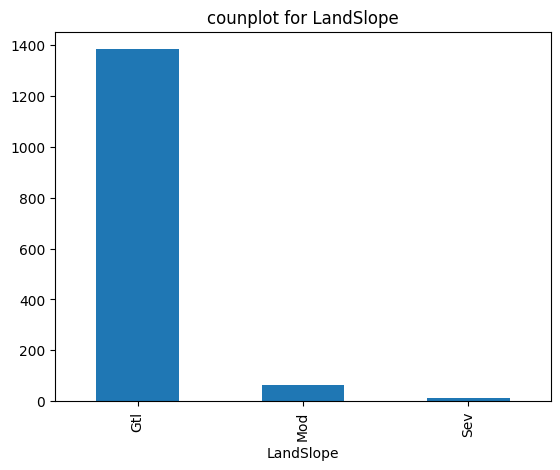

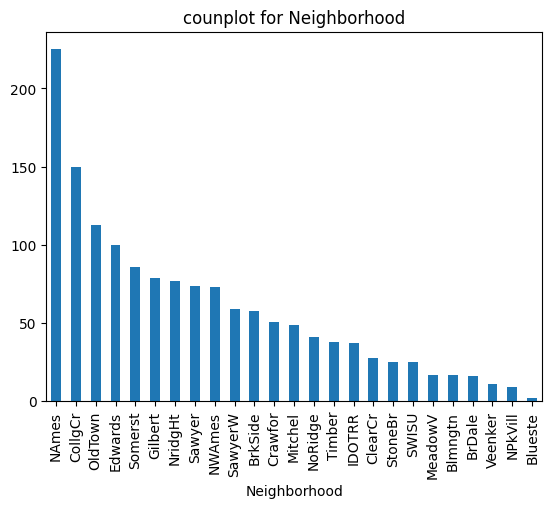

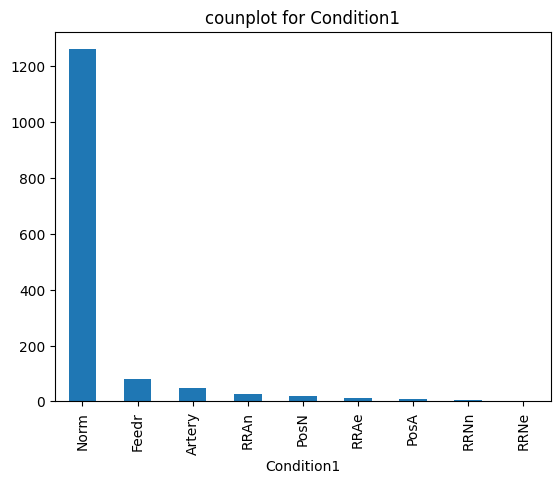

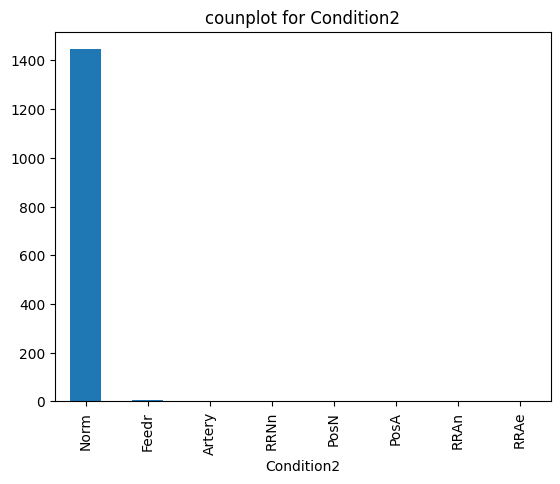

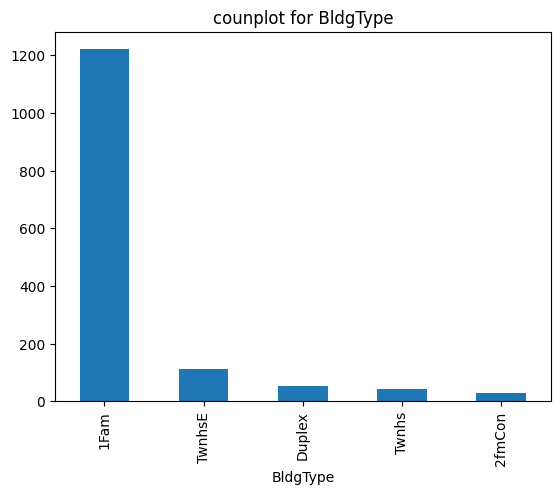

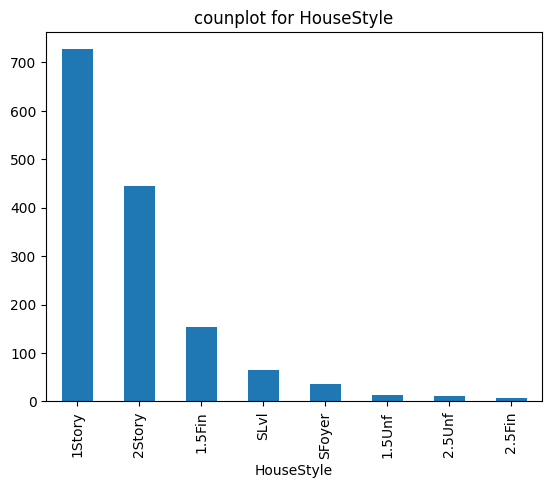

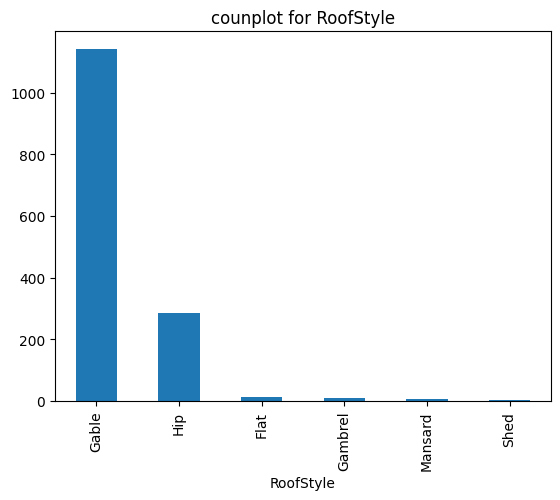

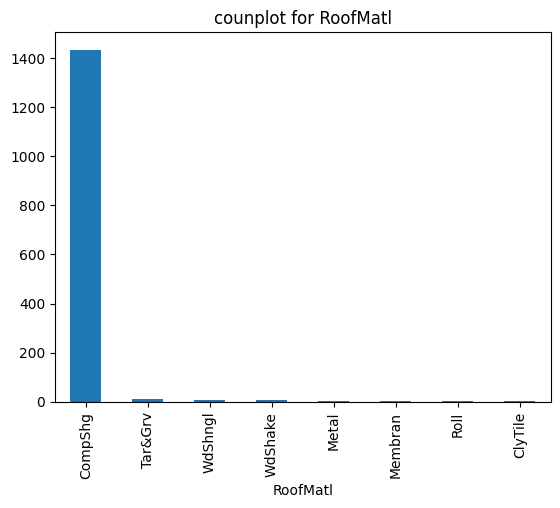

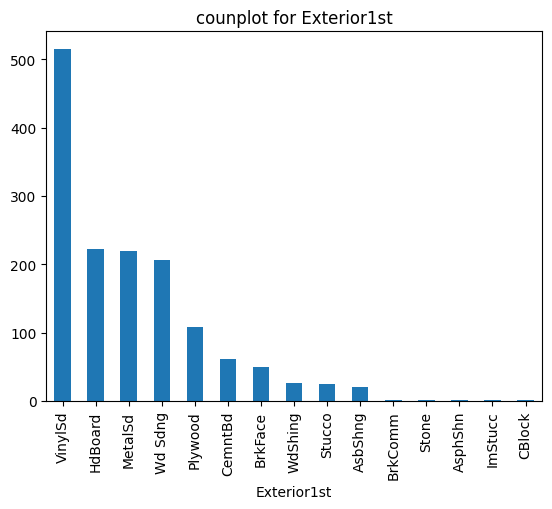

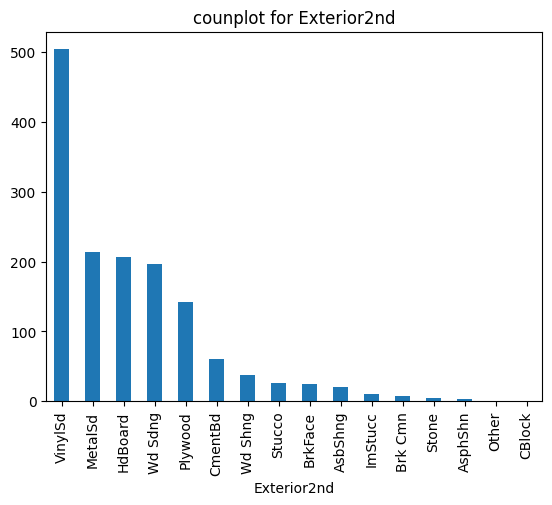

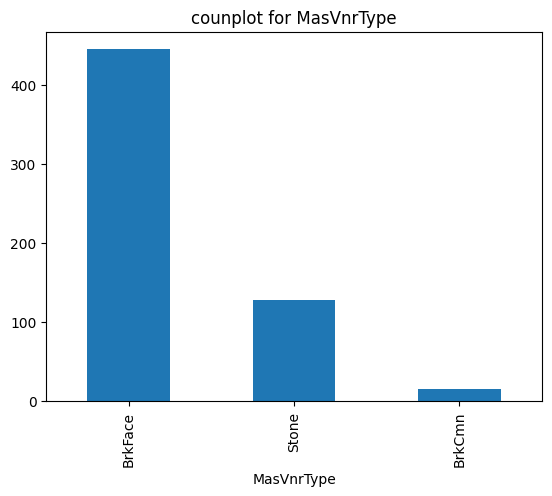

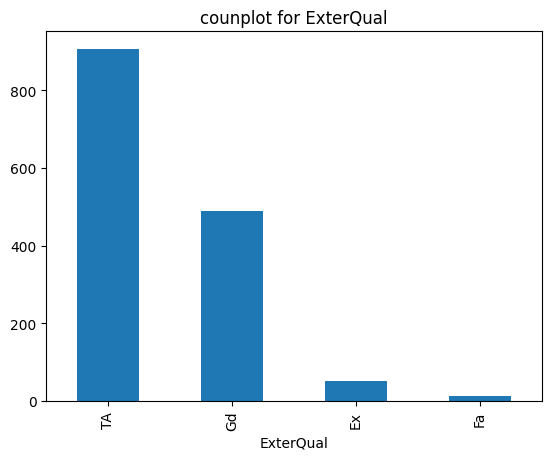

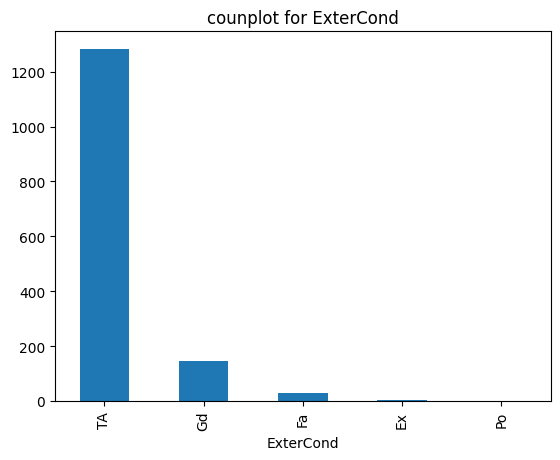

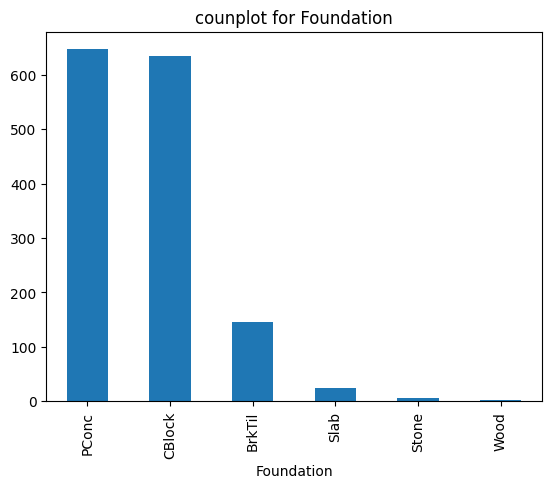

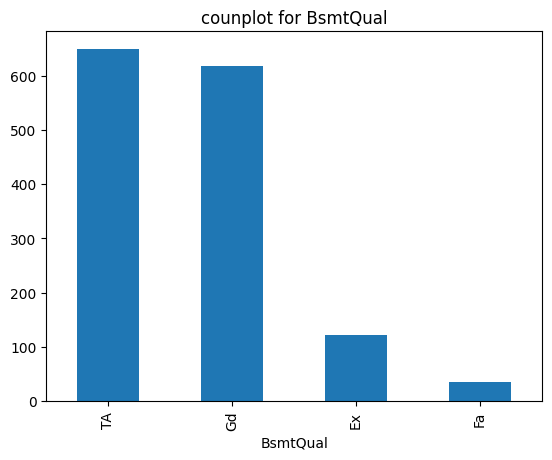

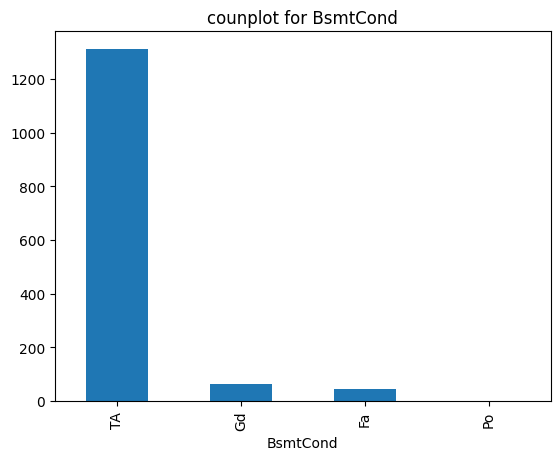

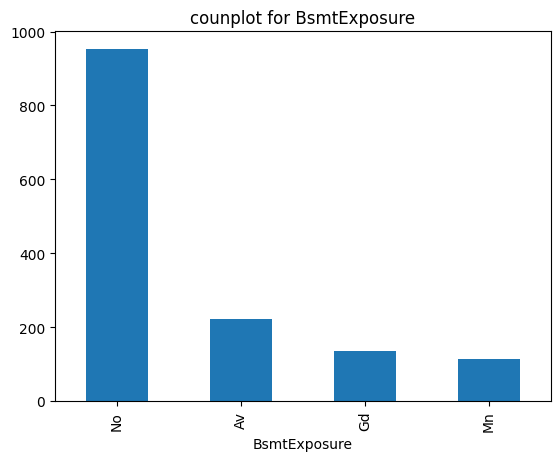

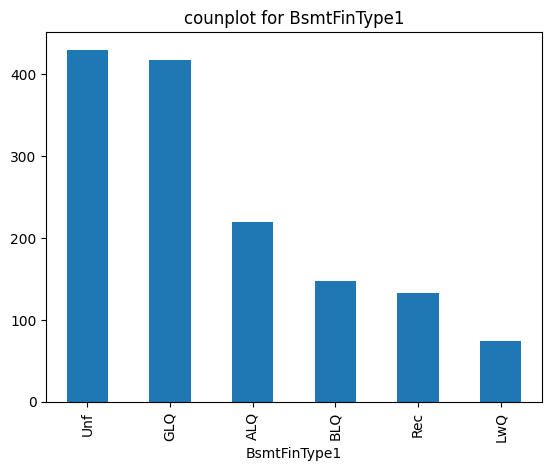

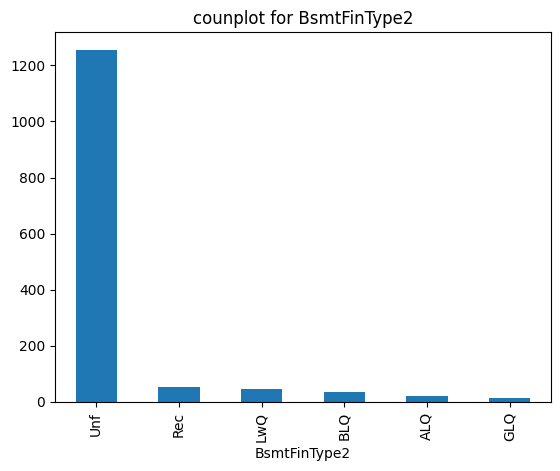

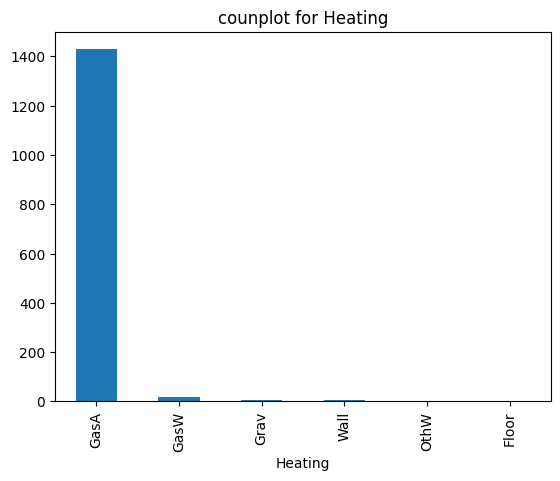

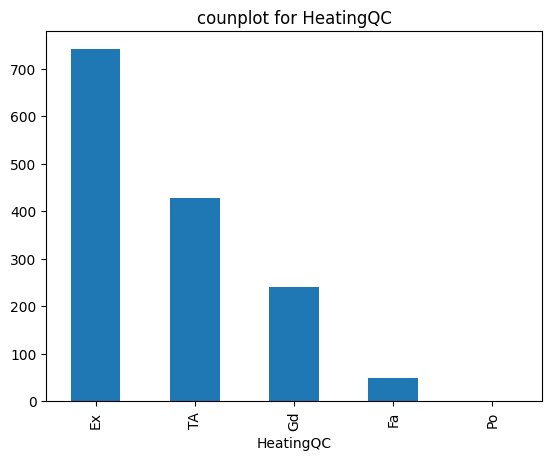

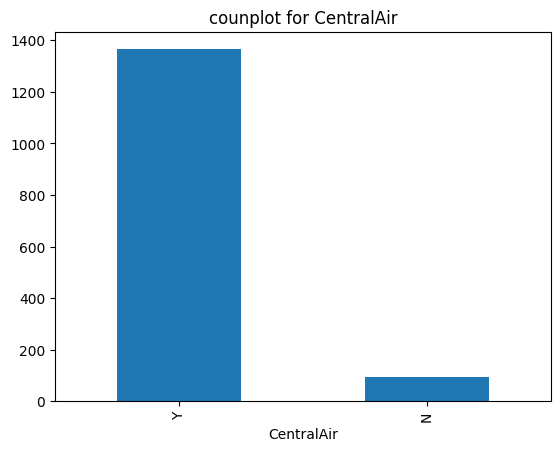

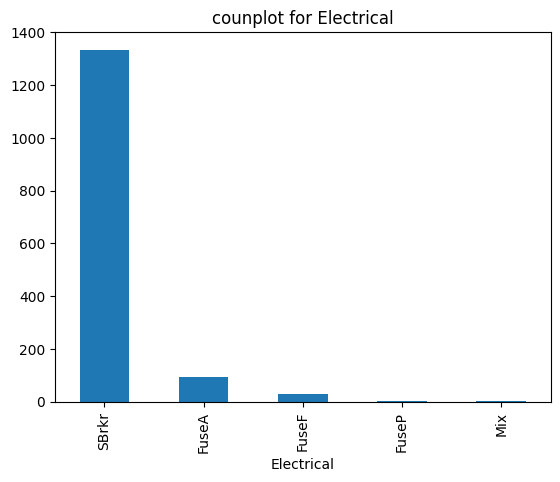

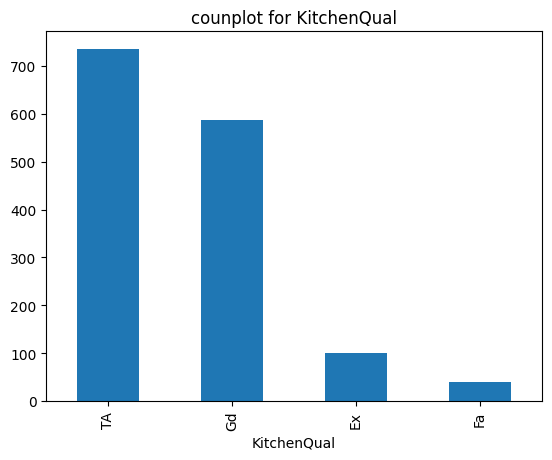

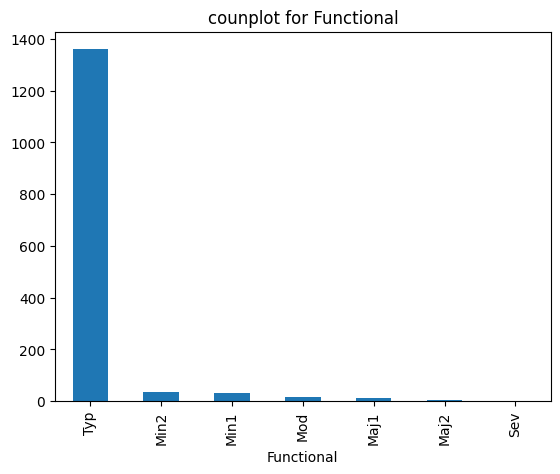

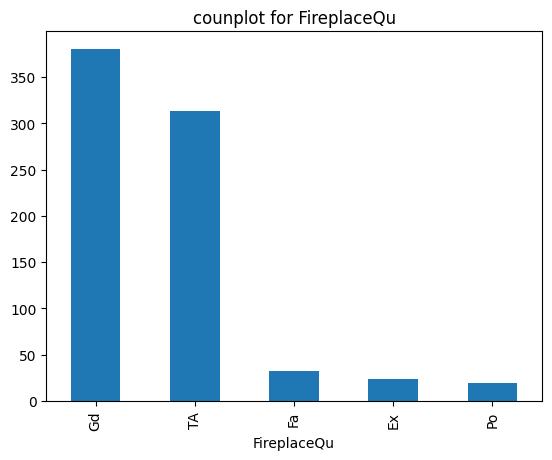

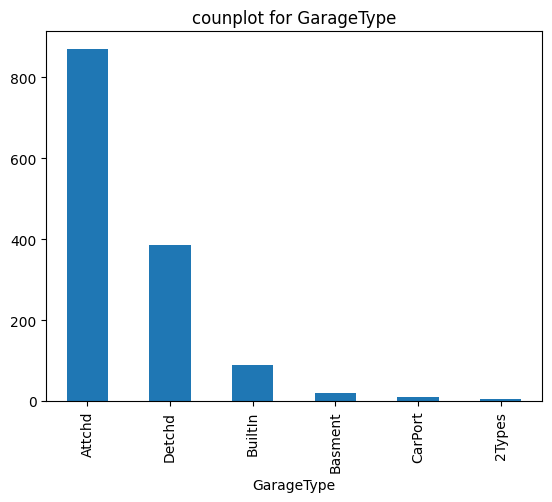

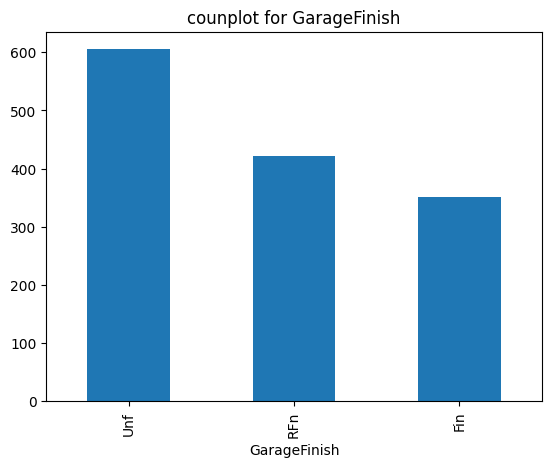

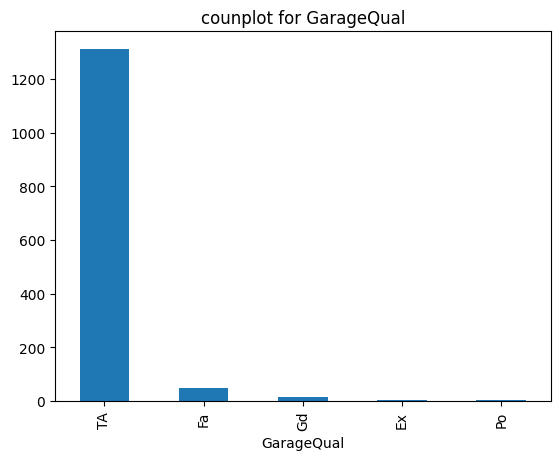

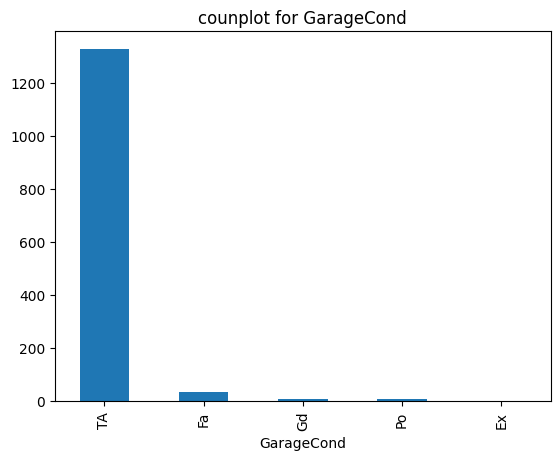

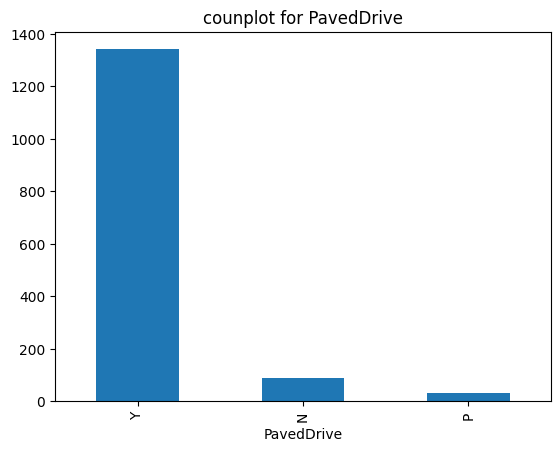

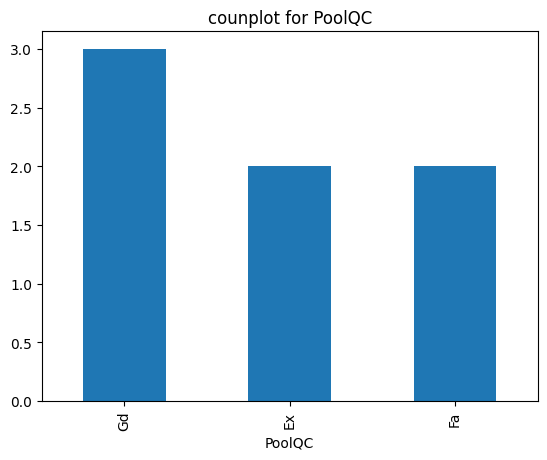

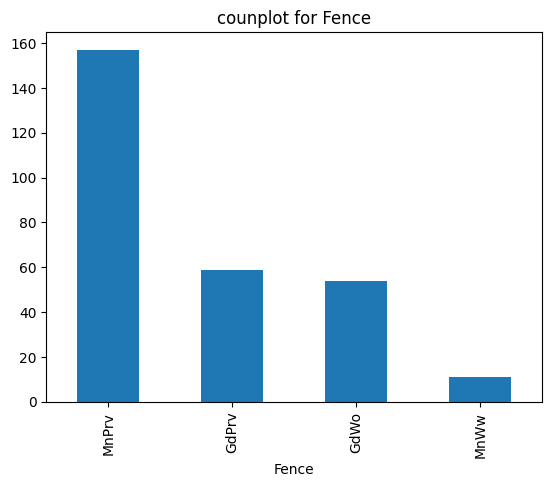

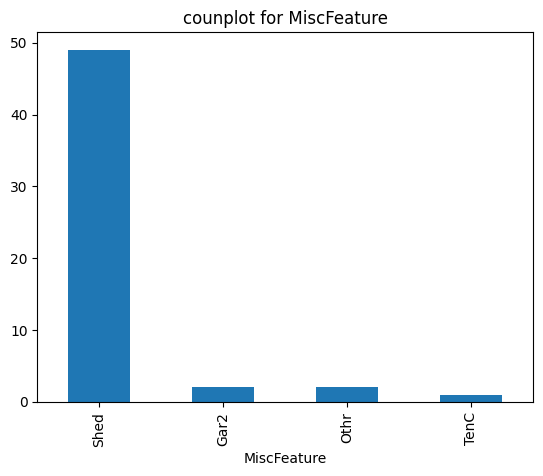

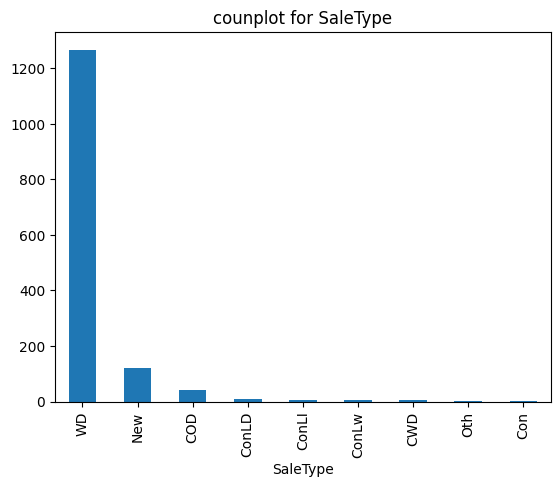

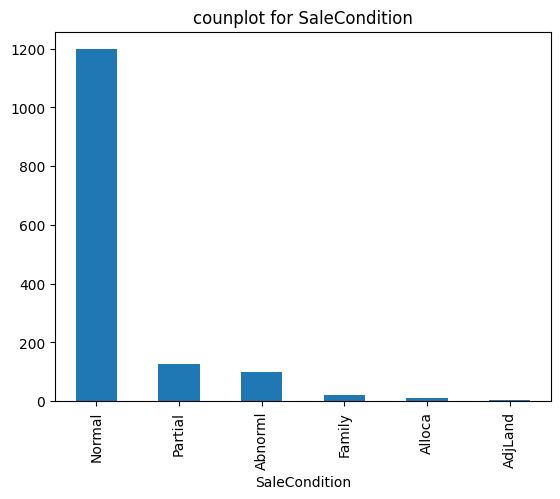

In [14]:
# Categorical features countplot
for i in cat:
    df[i].value_counts().plot(kind='bar', title=f'counplot for {i}')
    plt.show()

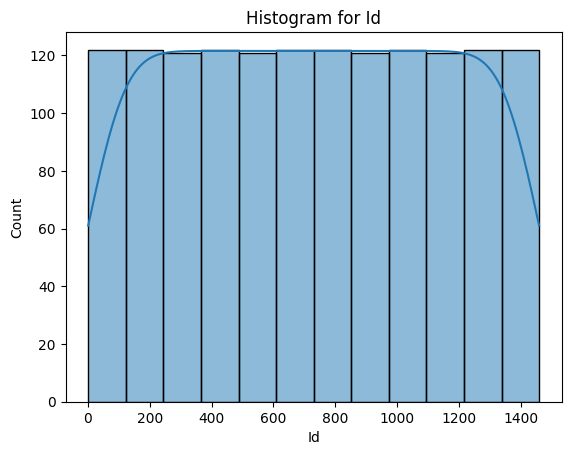

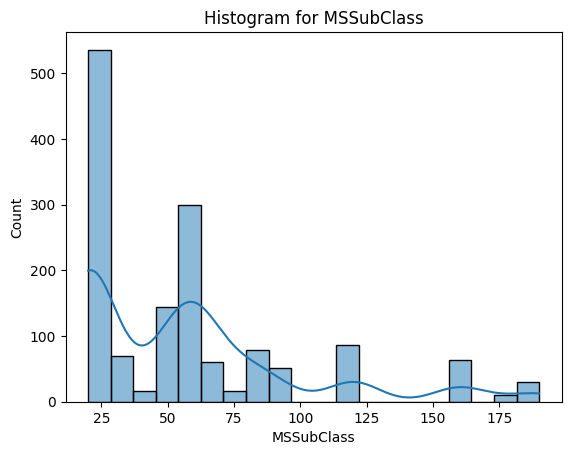

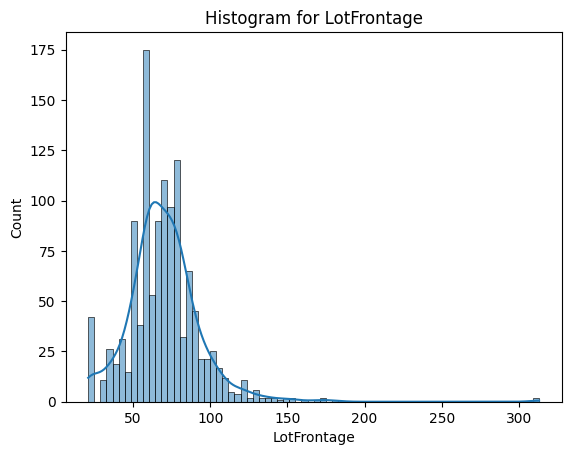

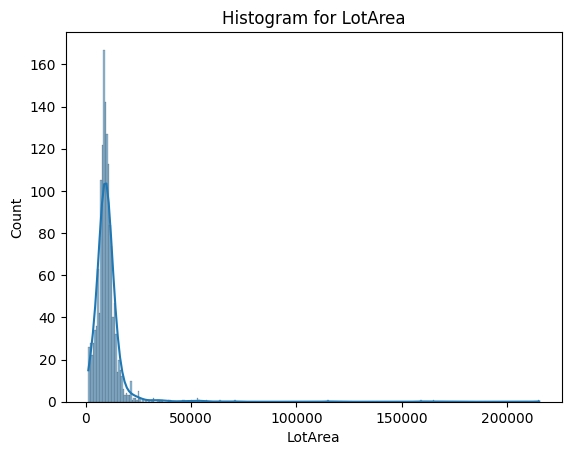

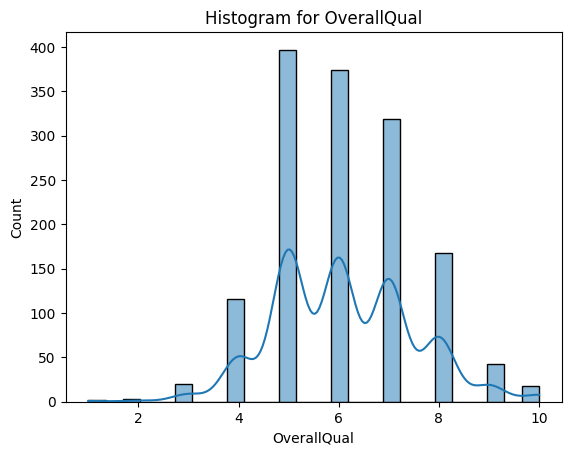

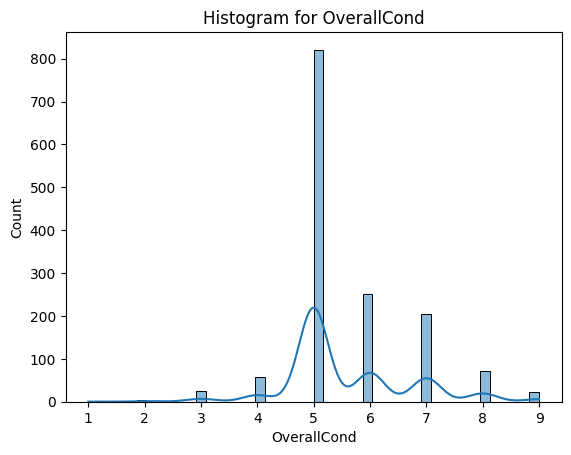

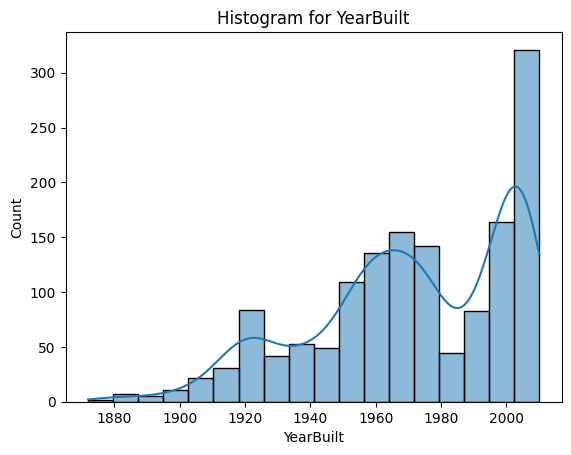

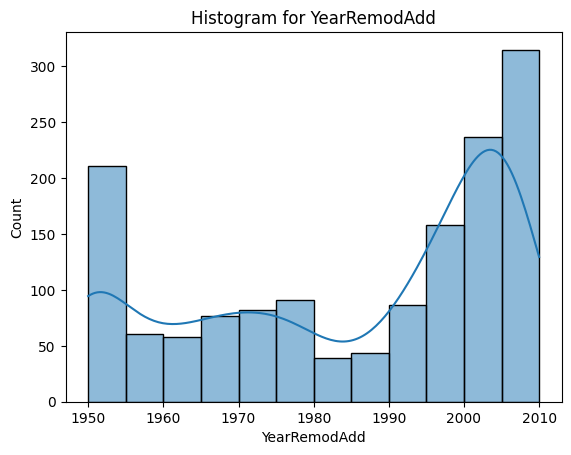

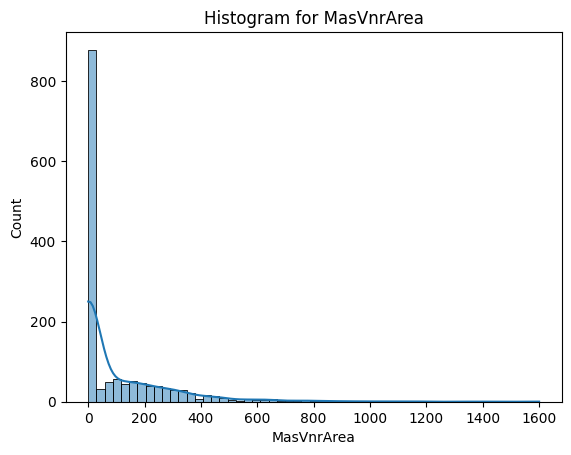

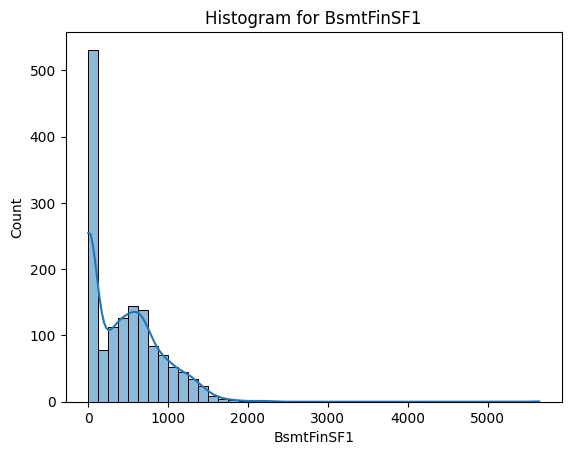

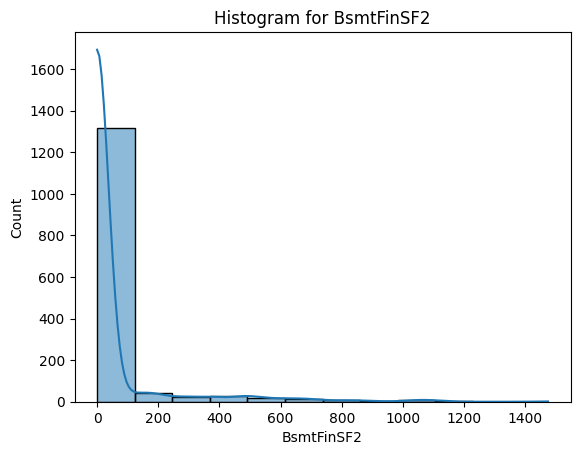

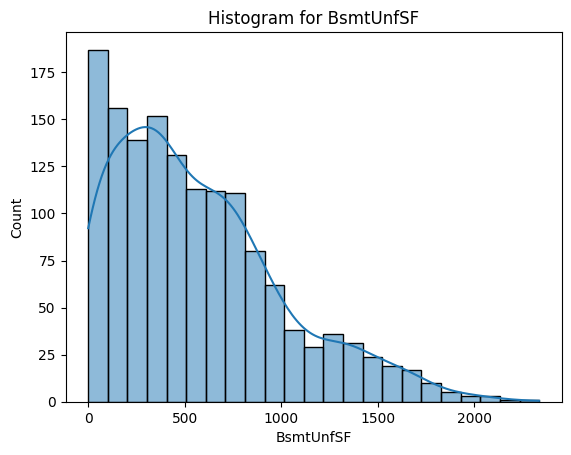

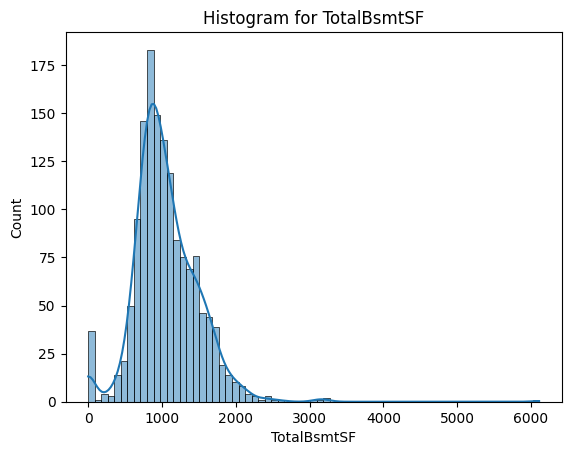

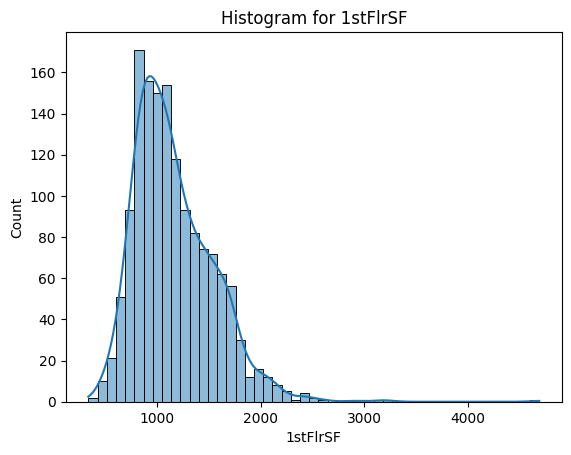

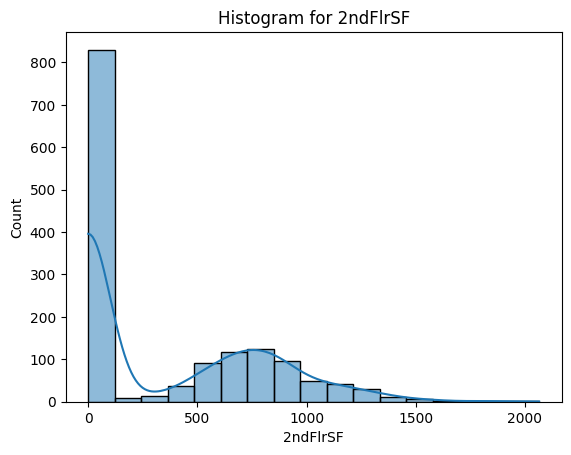

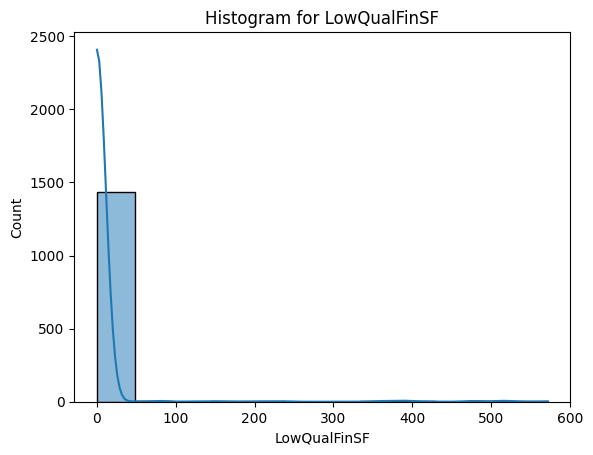

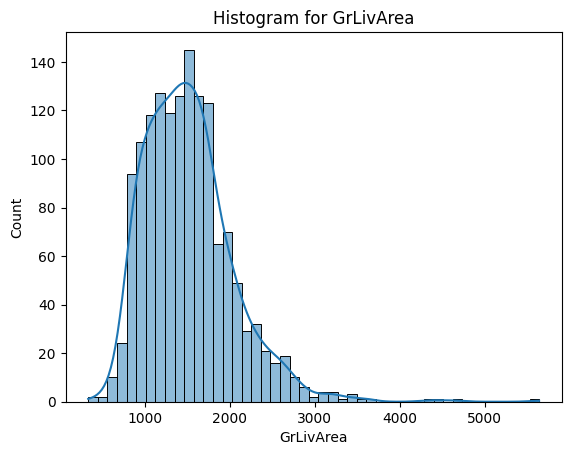

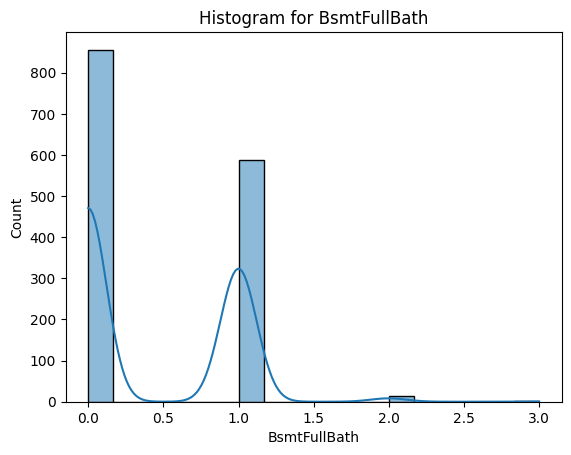

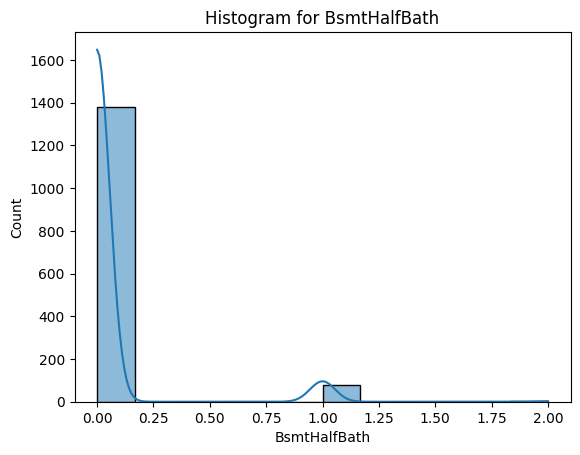

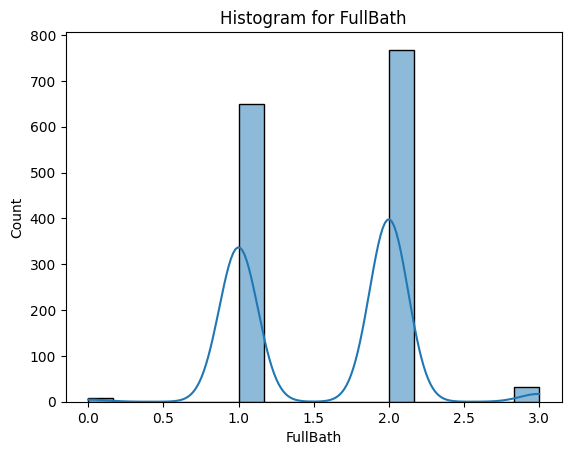

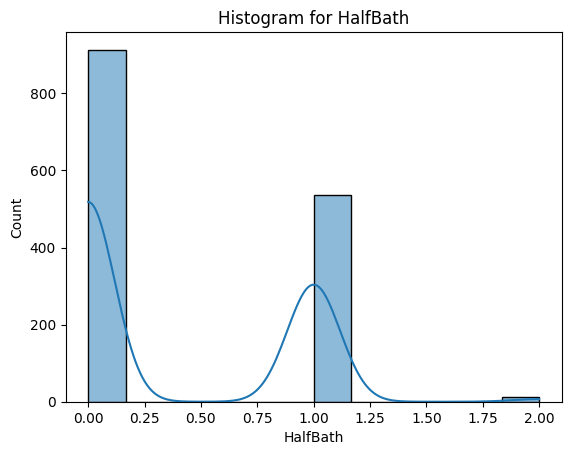

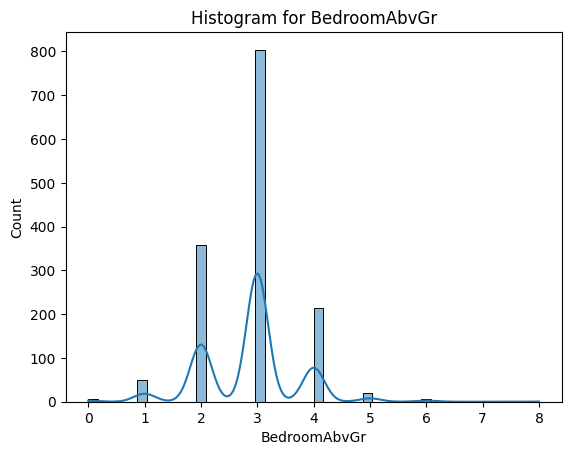

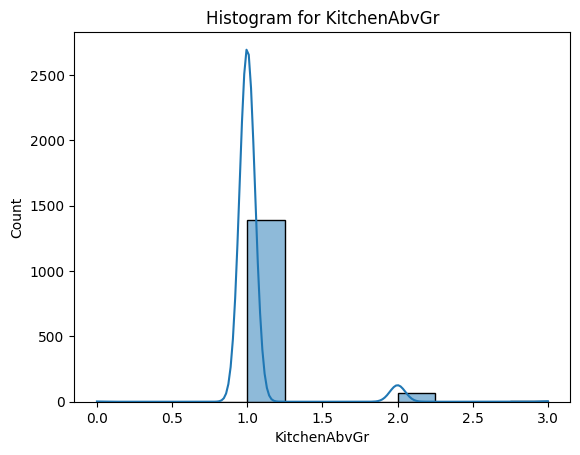

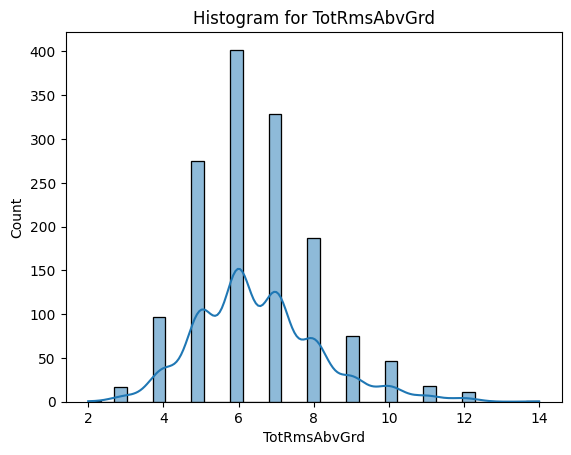

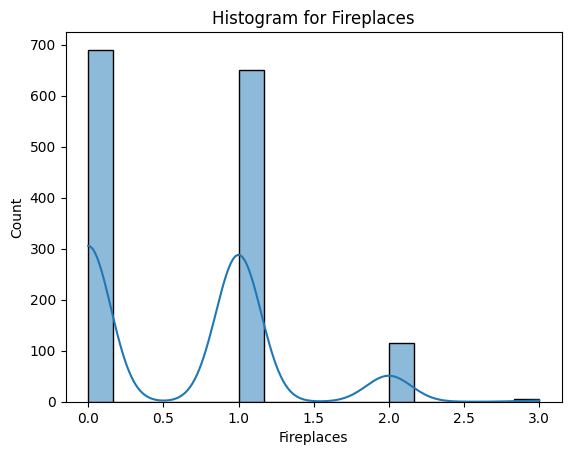

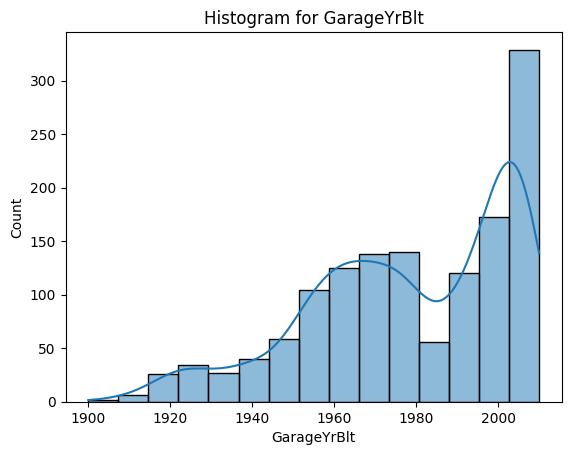

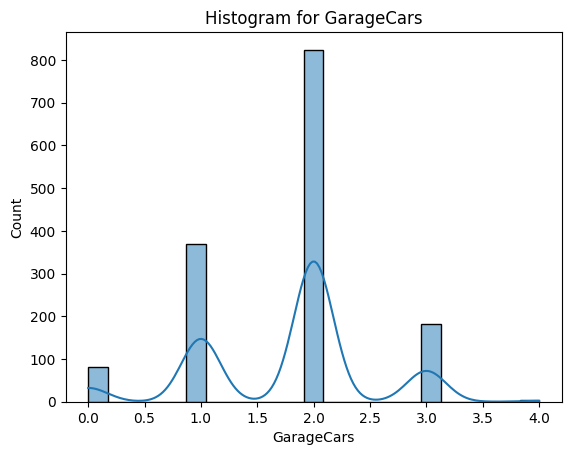

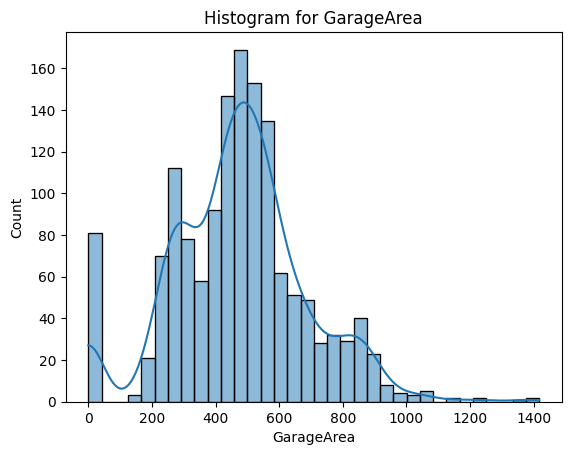

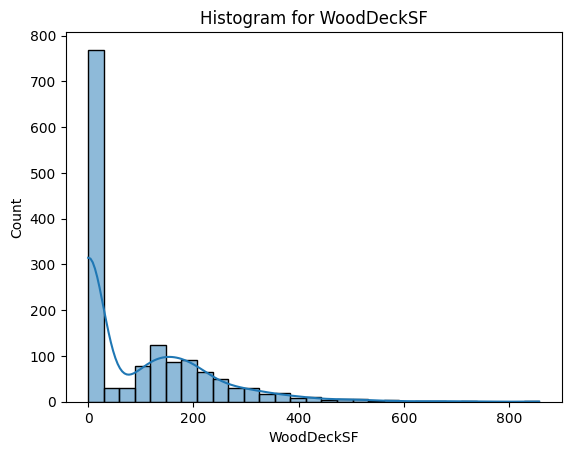

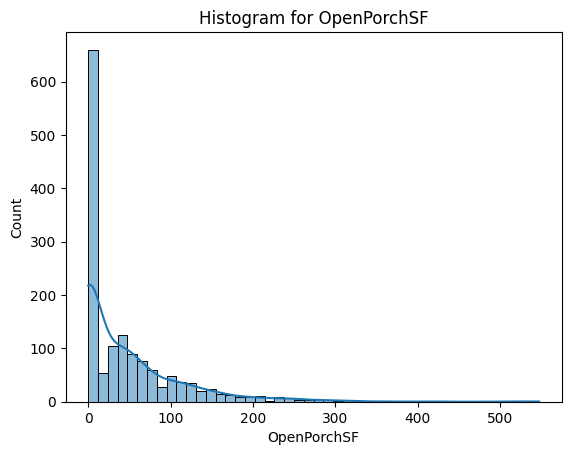

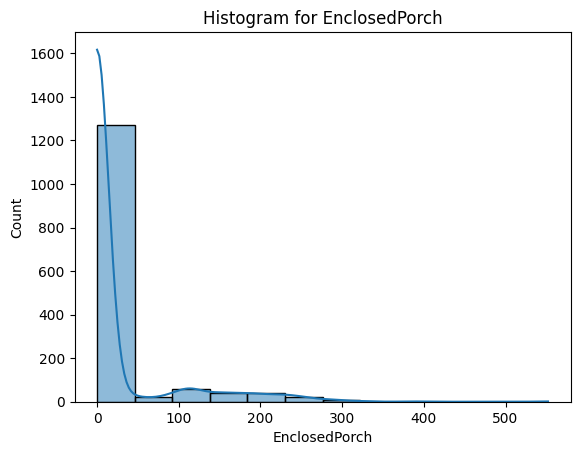

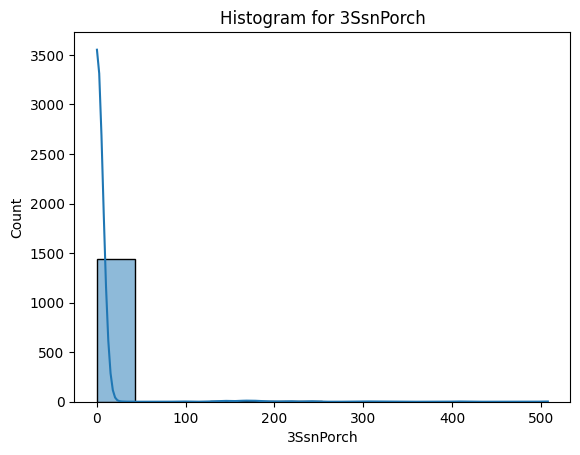

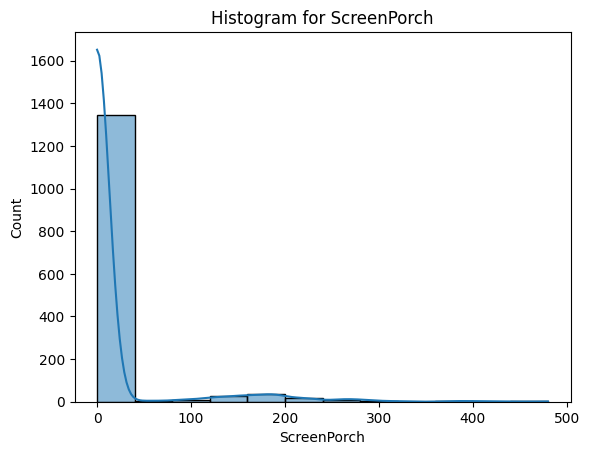

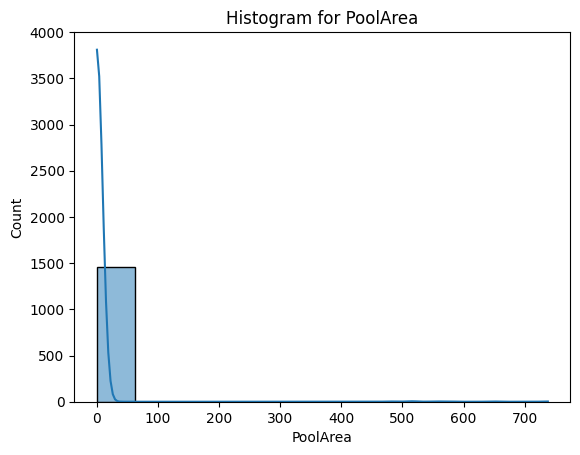

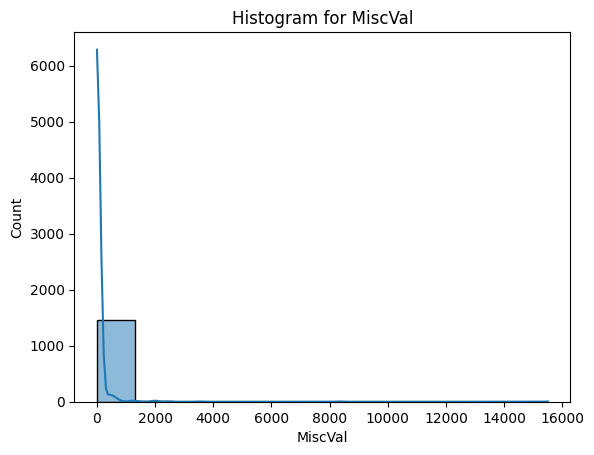

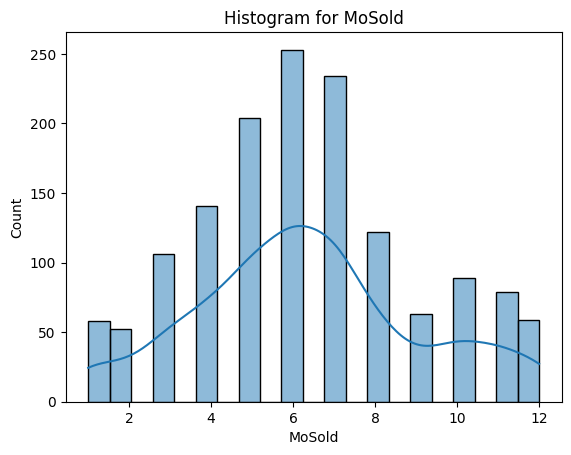

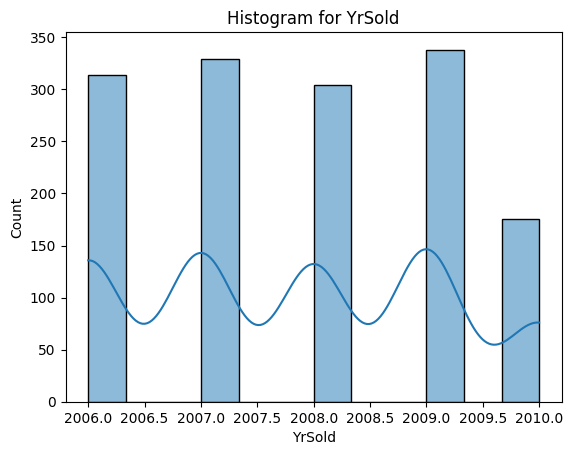

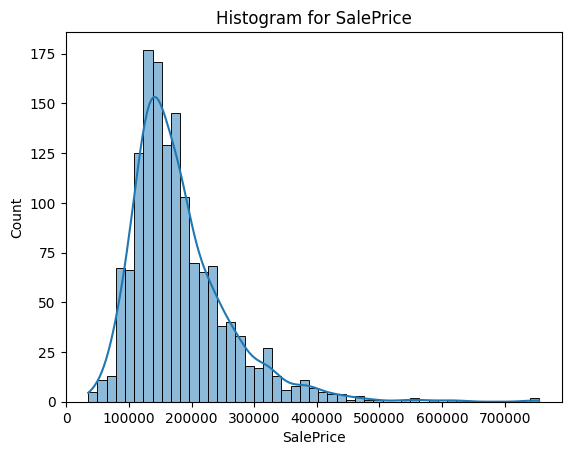

In [15]:
# Continuous features apply Histogram
for i in con:
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

### Bivariate 

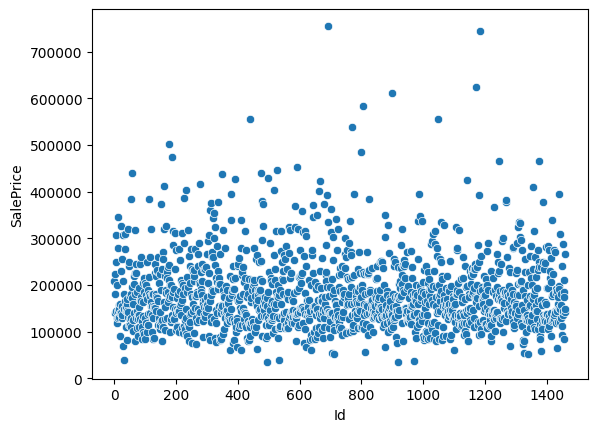

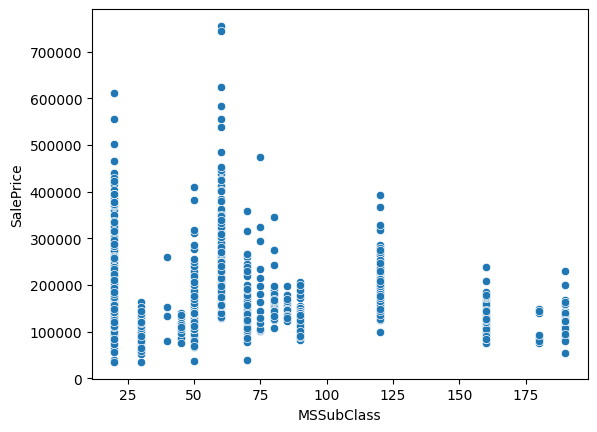

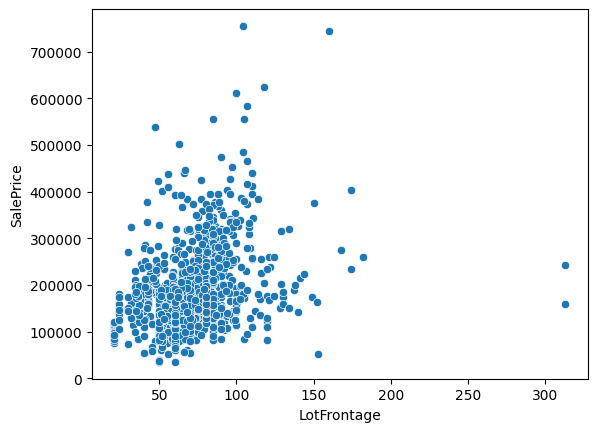

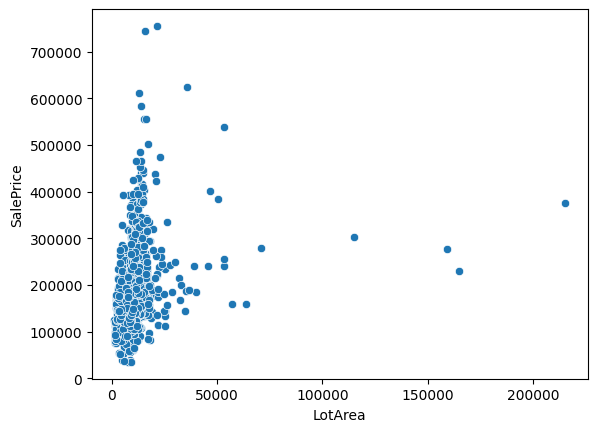

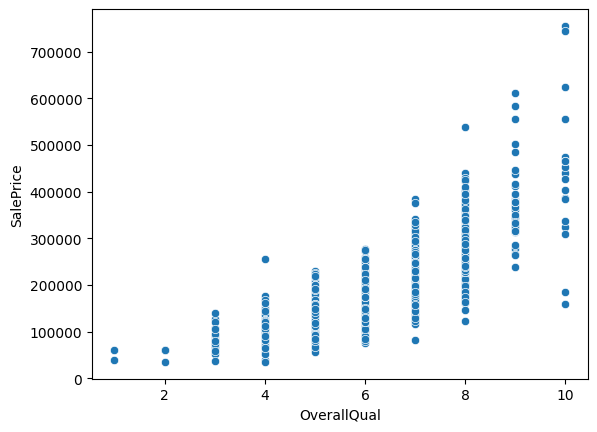

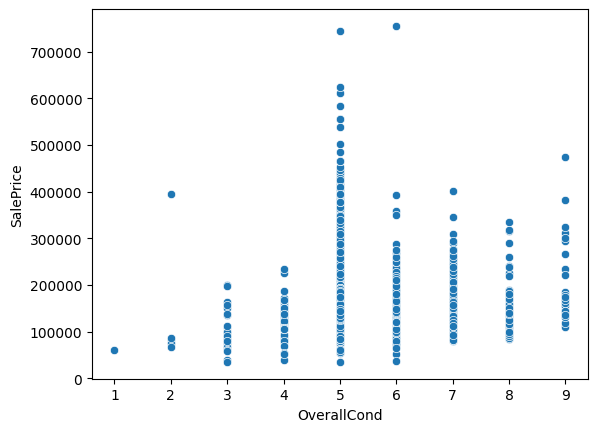

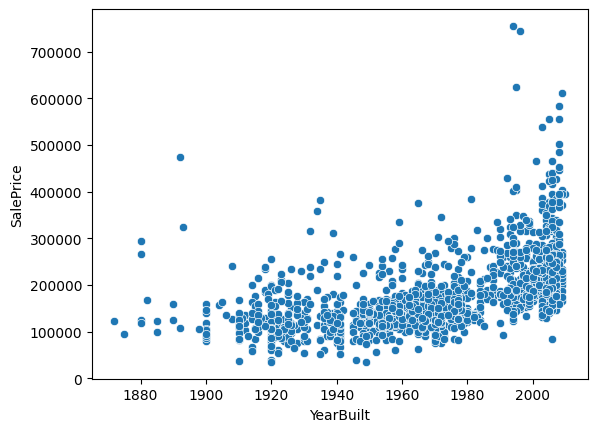

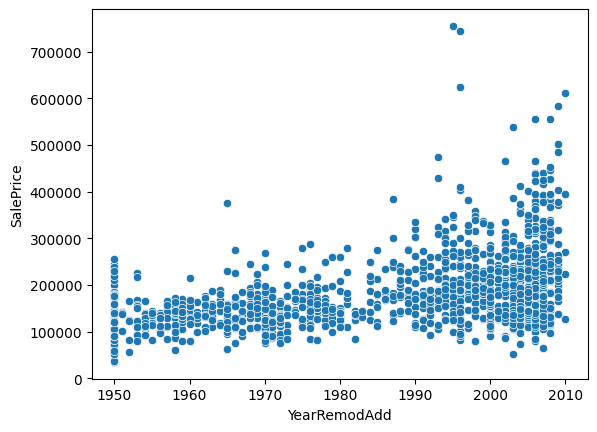

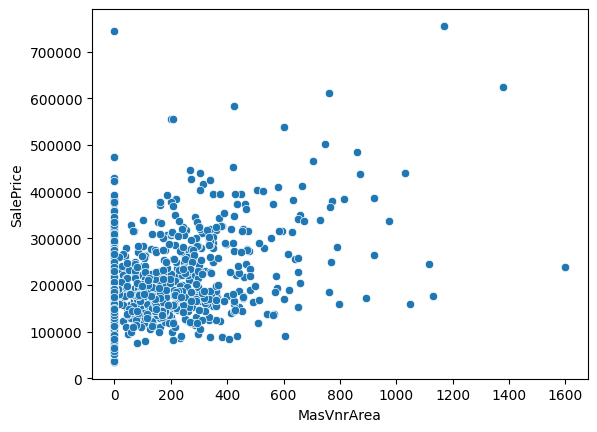

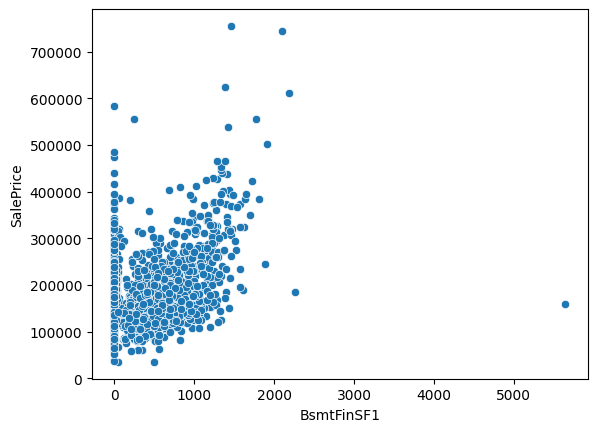

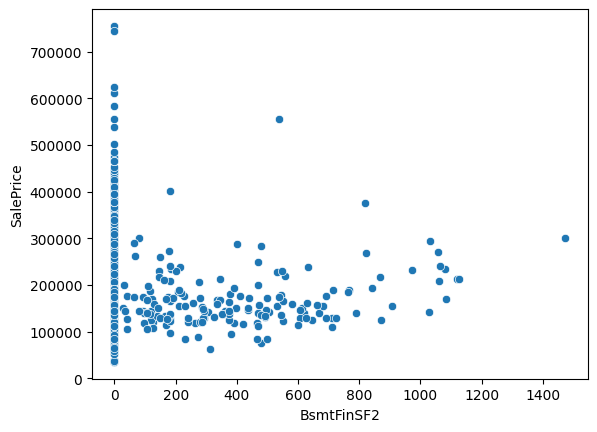

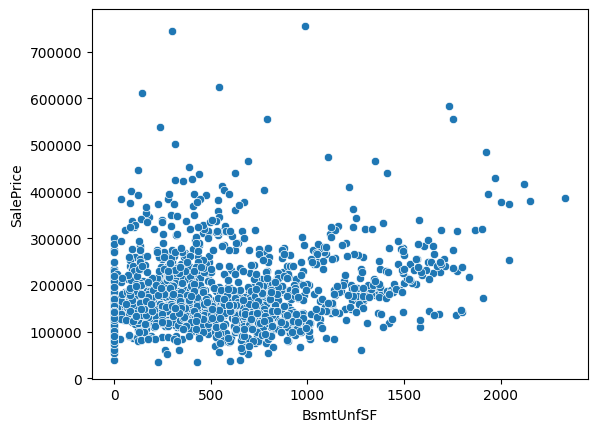

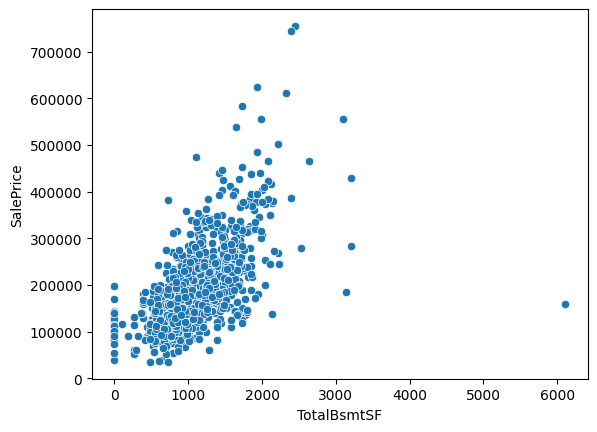

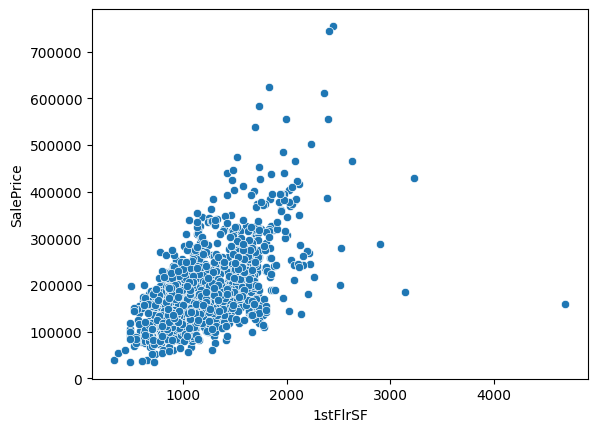

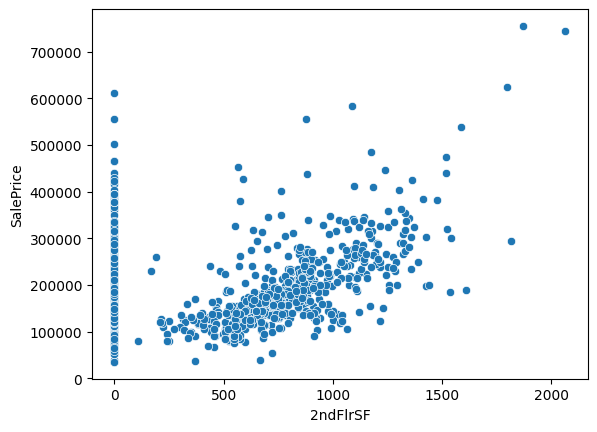

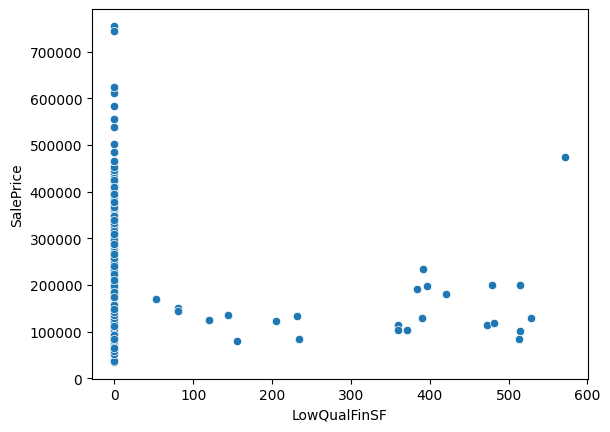

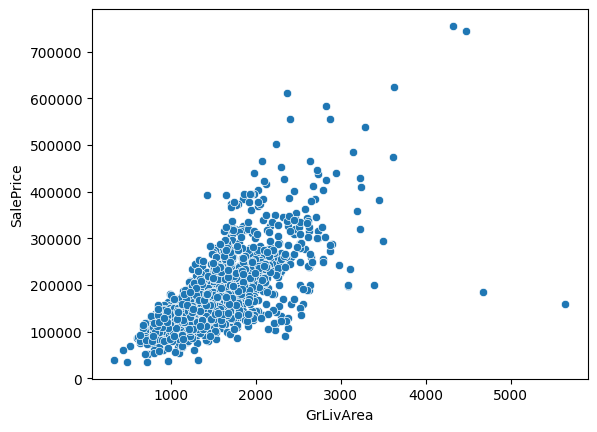

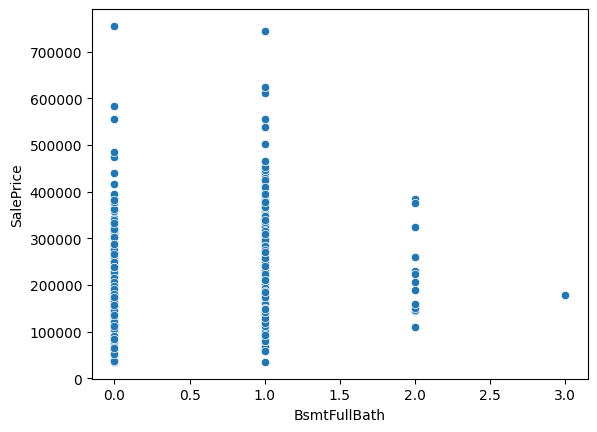

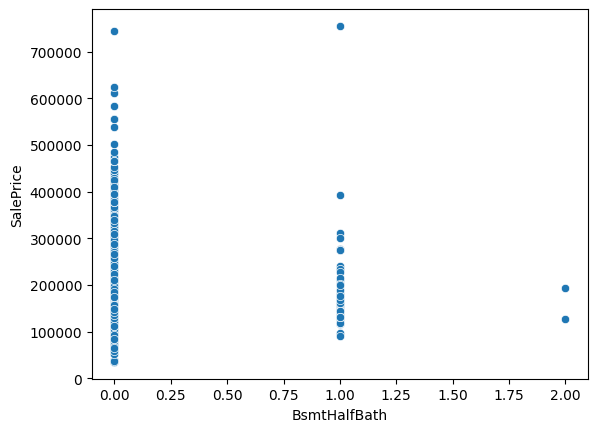

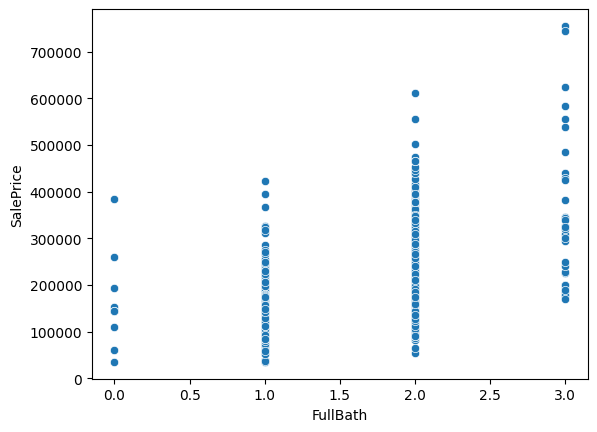

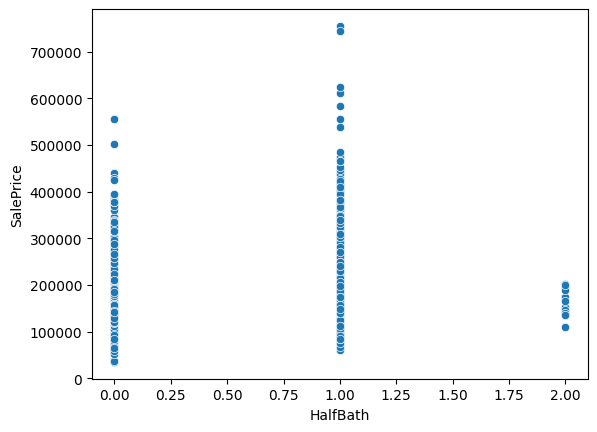

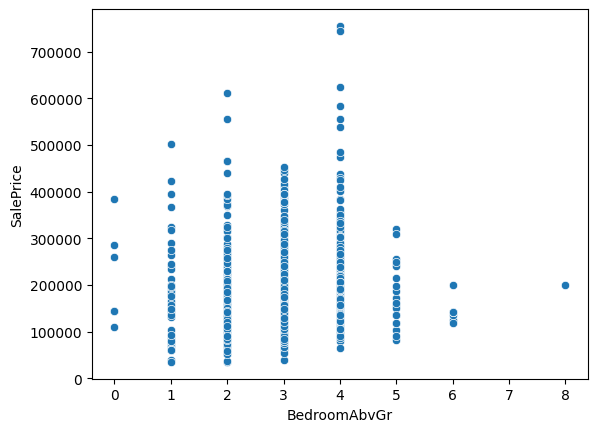

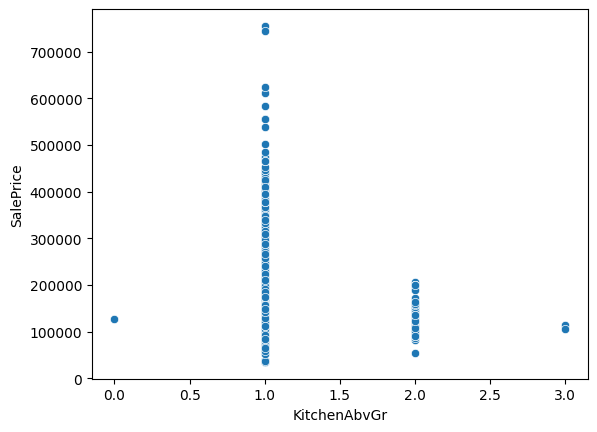

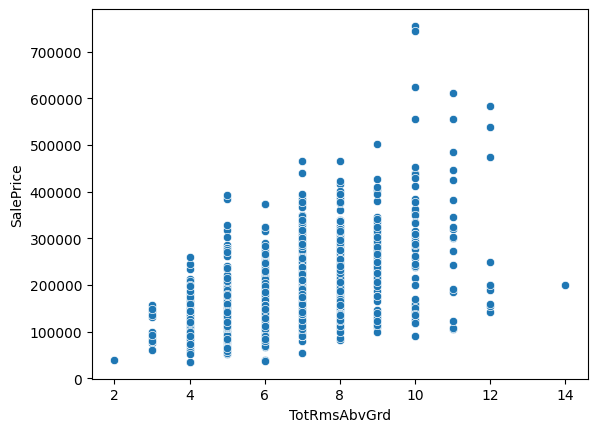

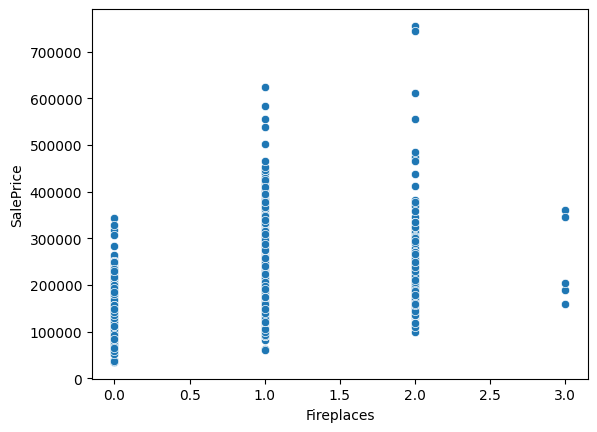

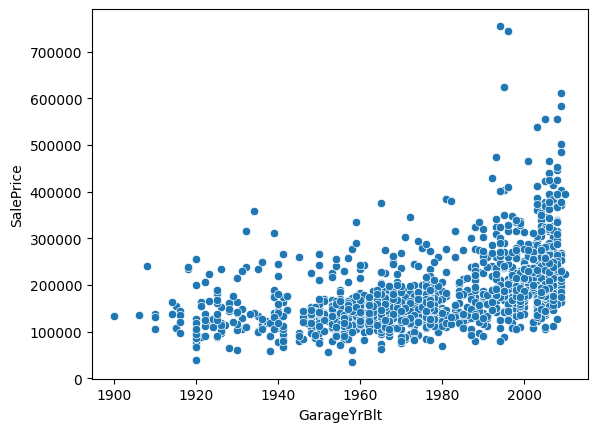

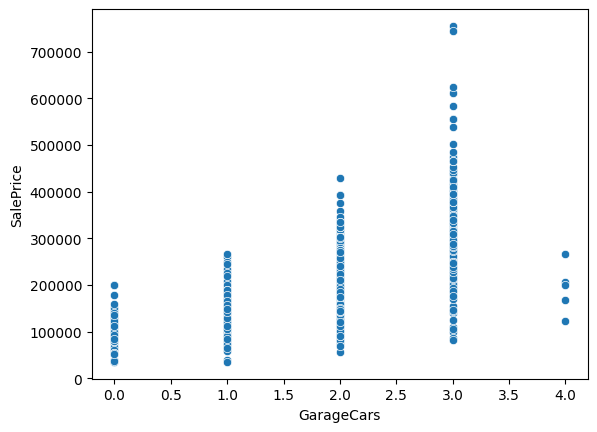

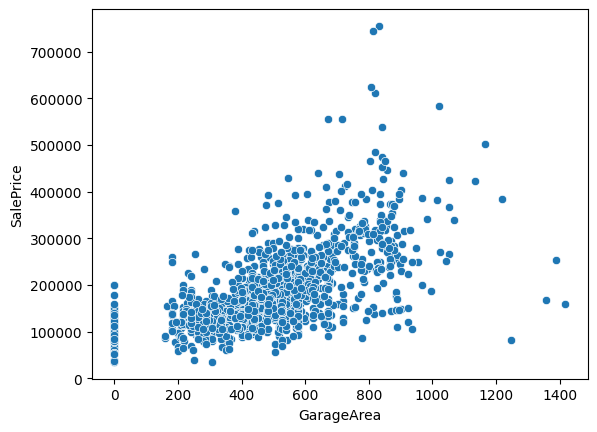

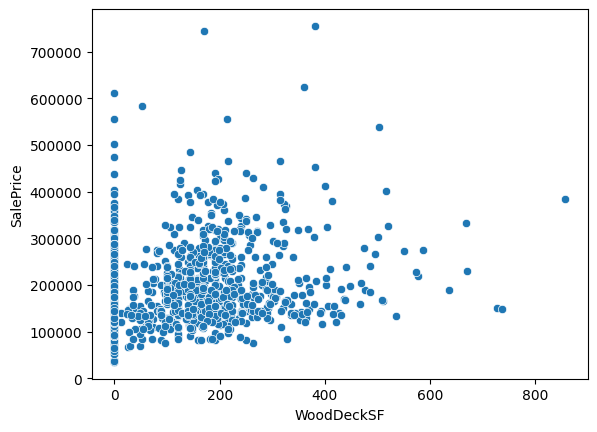

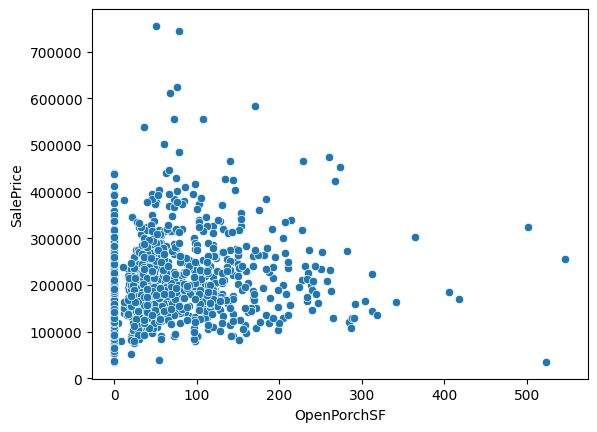

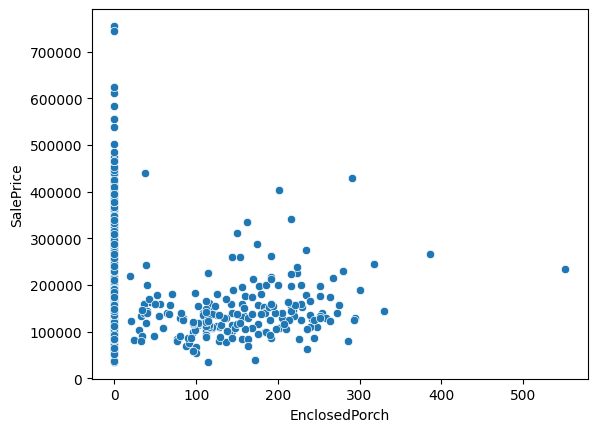

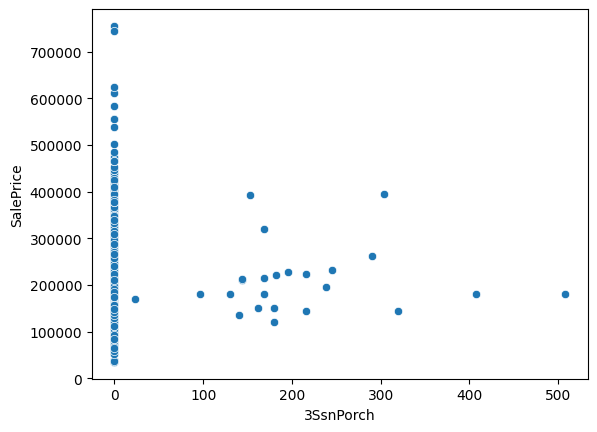

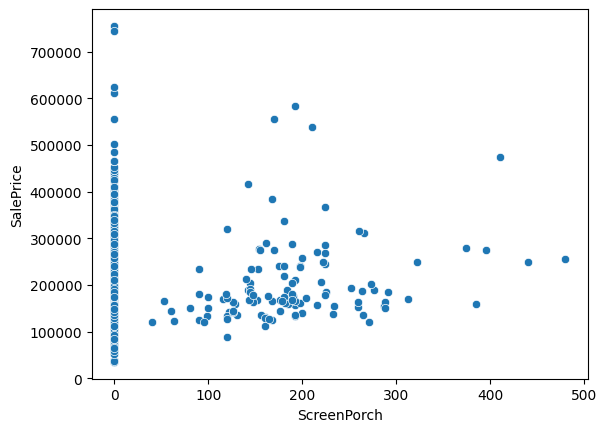

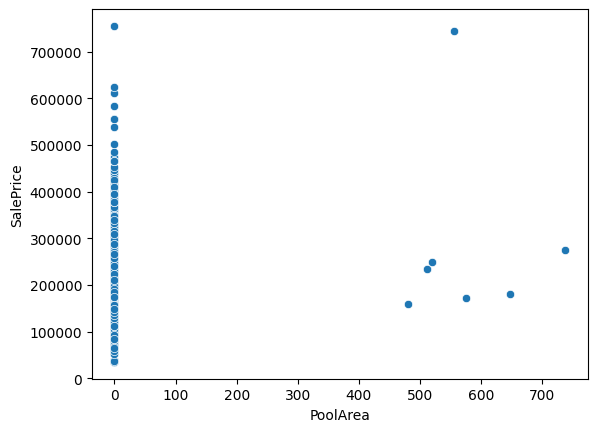

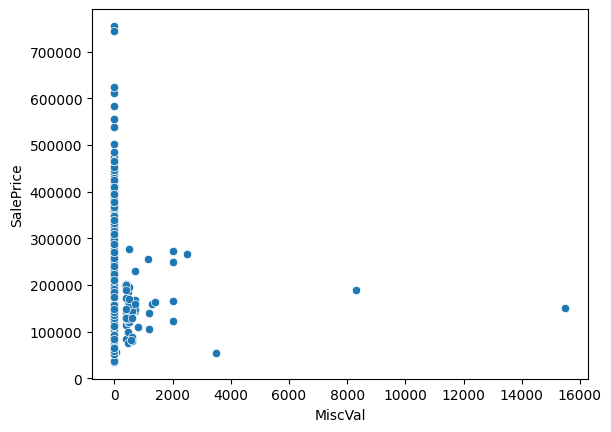

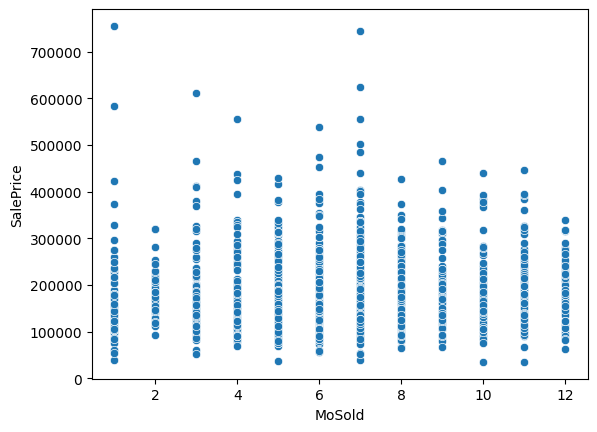

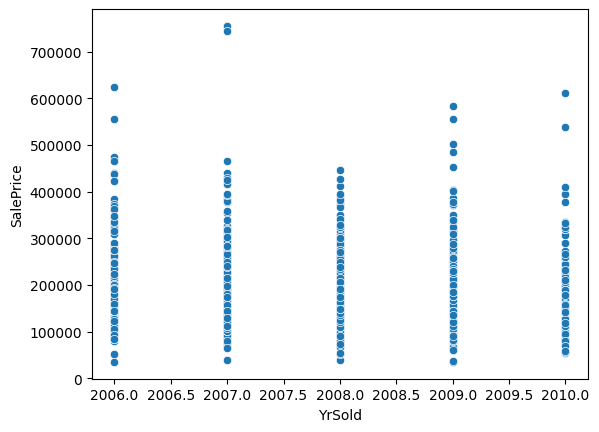

In [16]:
# Con vs Con features
for i in con:
    if i!='SalePrice':
        sns.scatterplot(data=df, x=i, y='SalePrice')
        plt.show()

# Cat vs Con - Boxplot

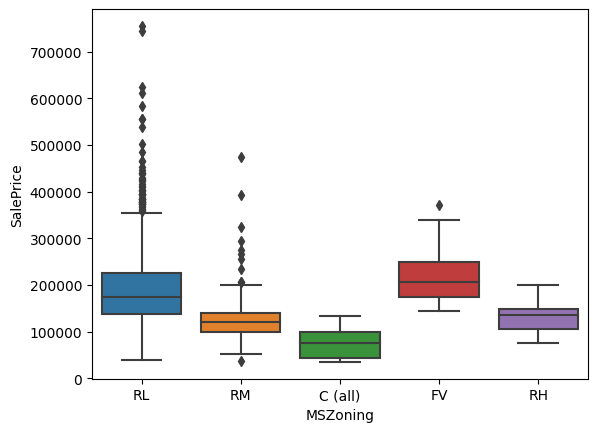

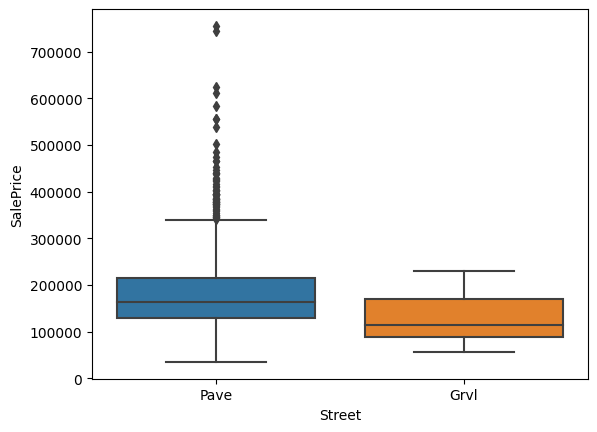

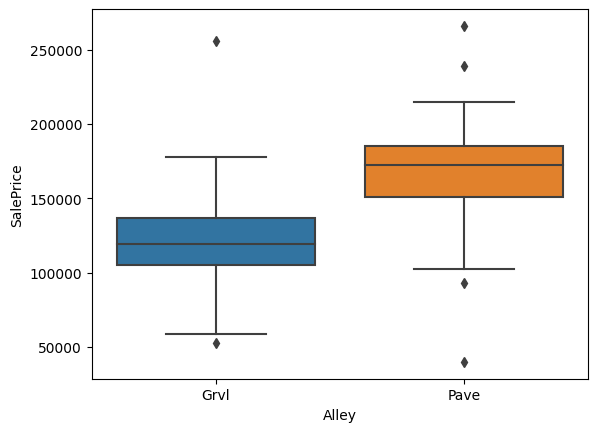

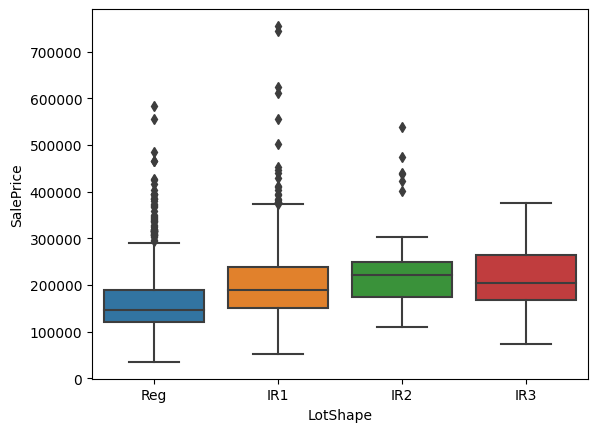

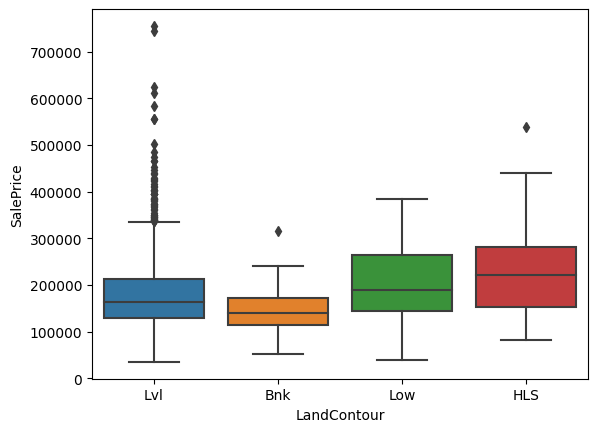

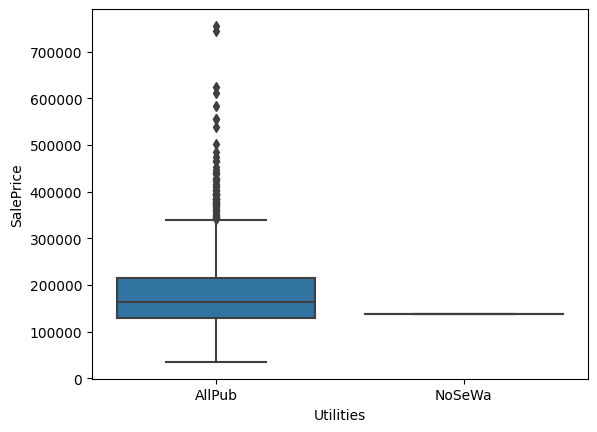

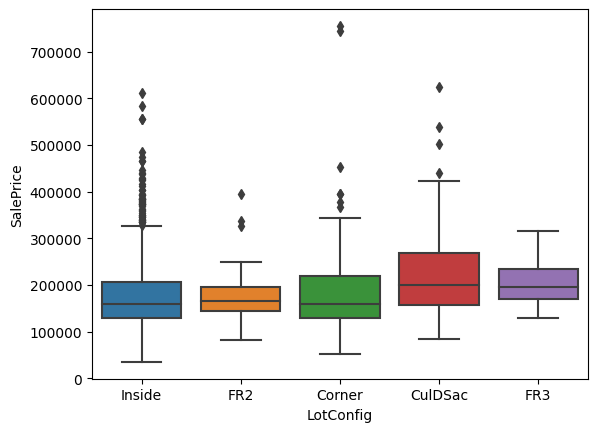

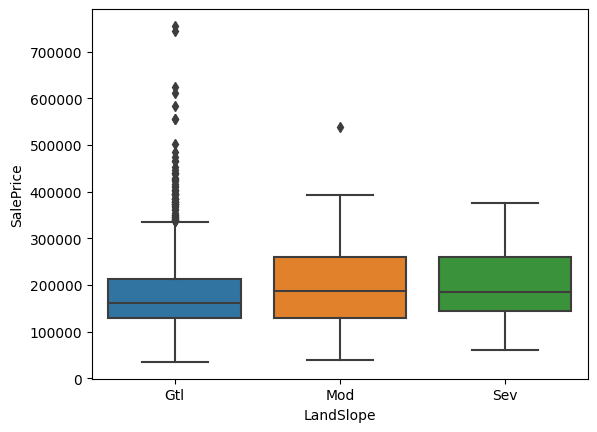

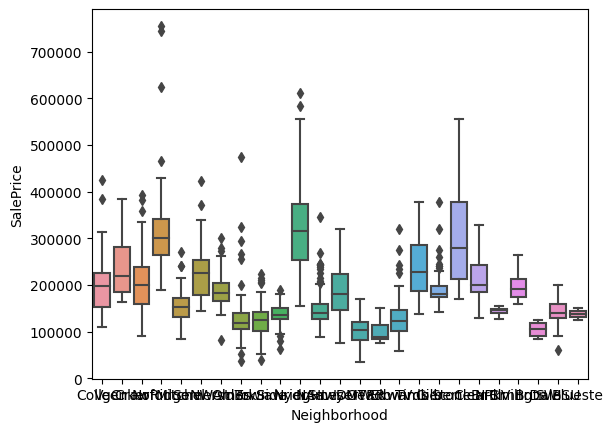

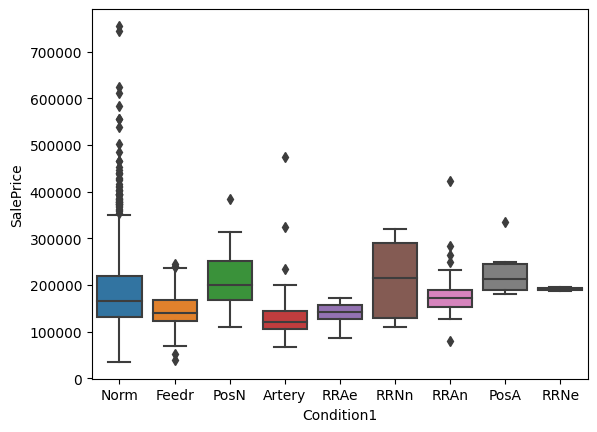

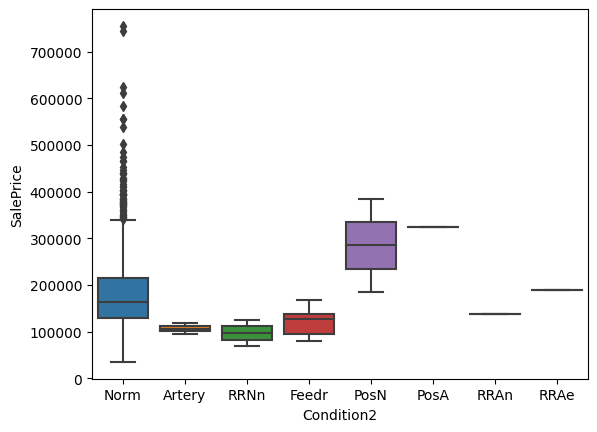

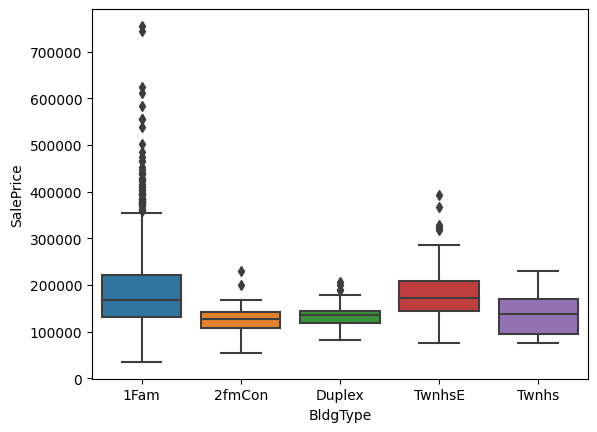

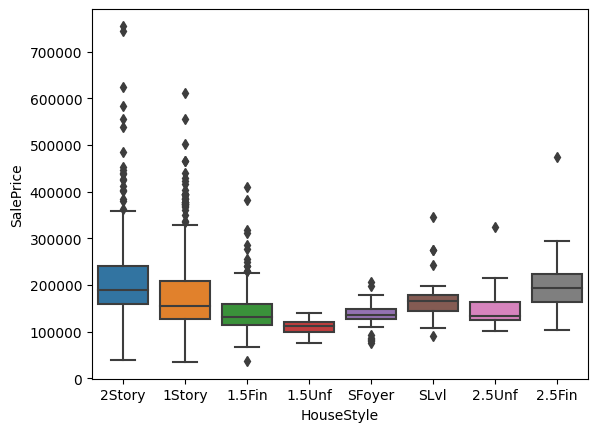

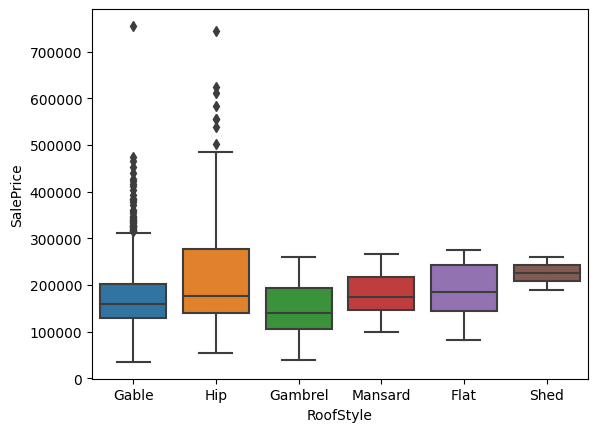

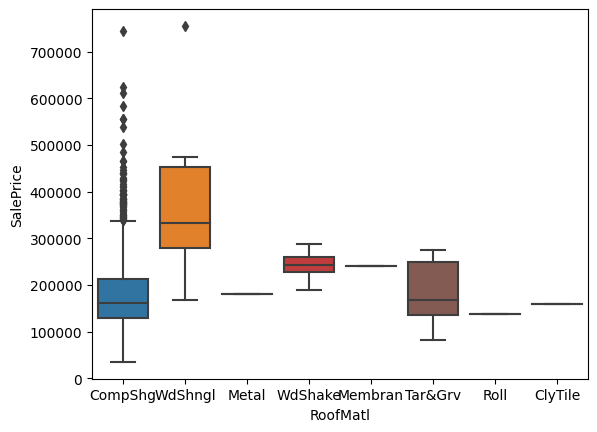

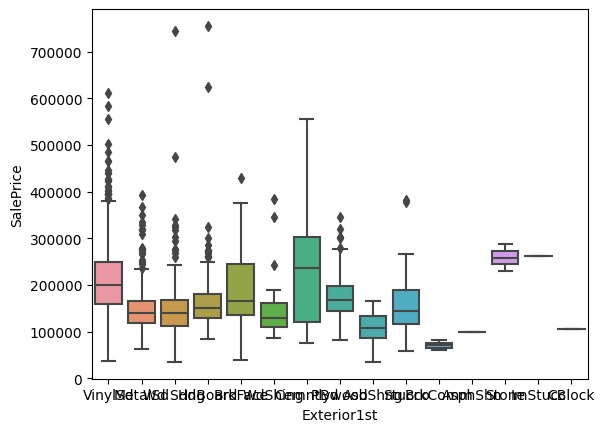

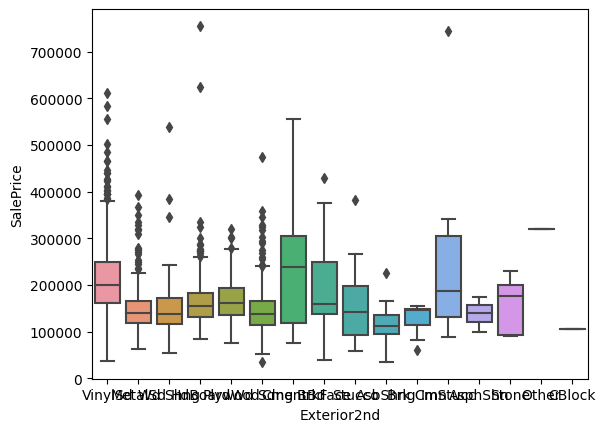

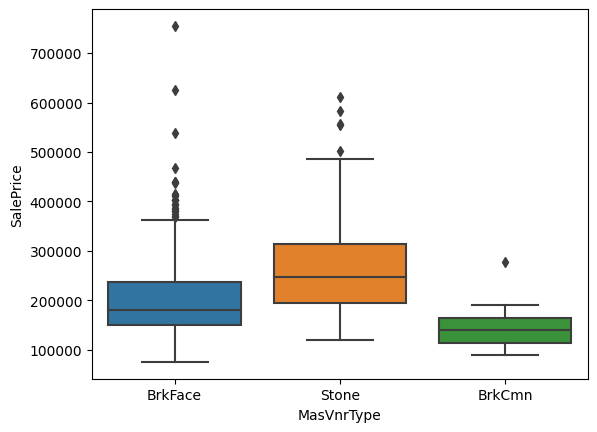

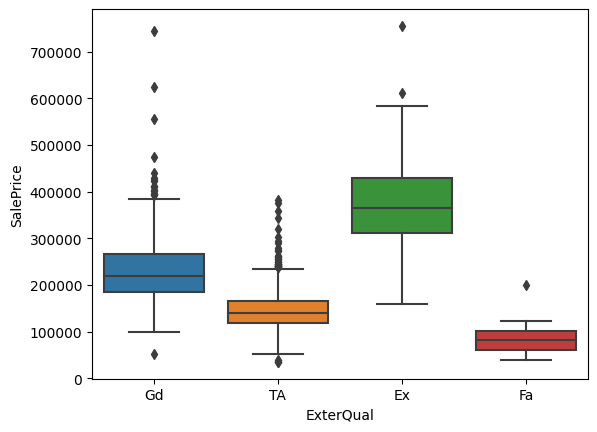

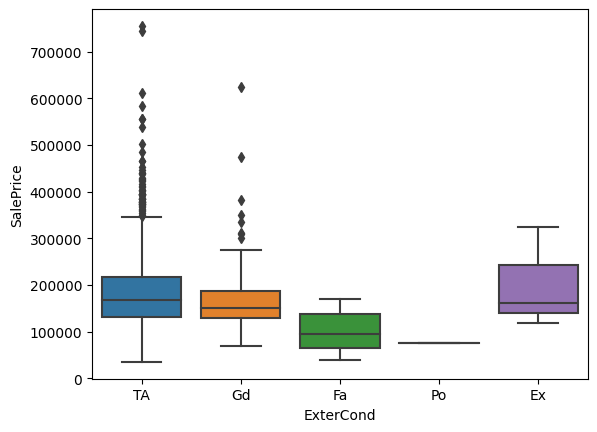

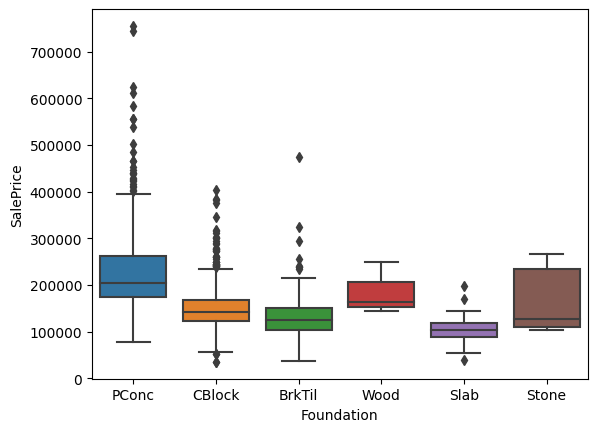

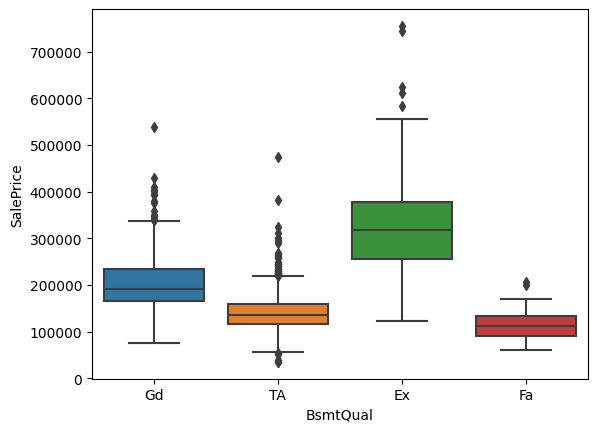

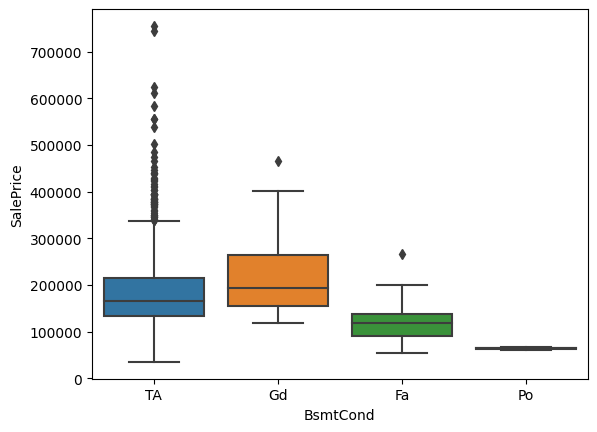

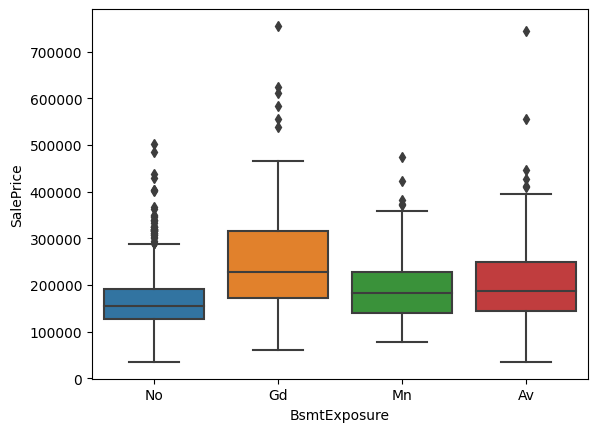

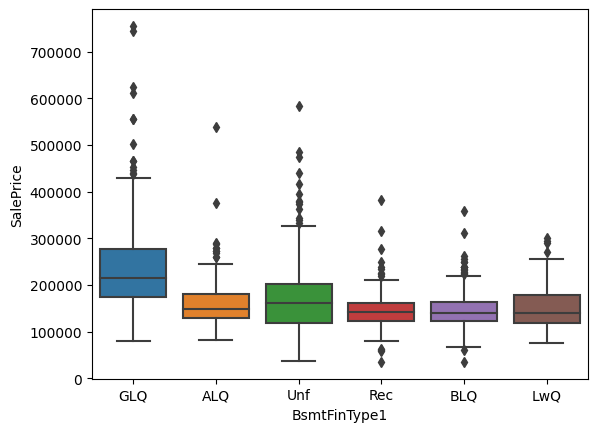

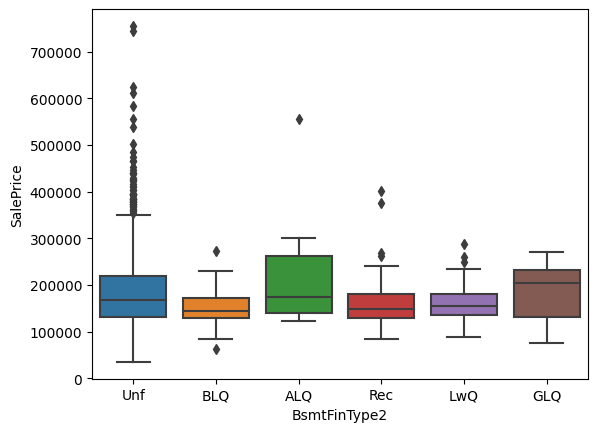

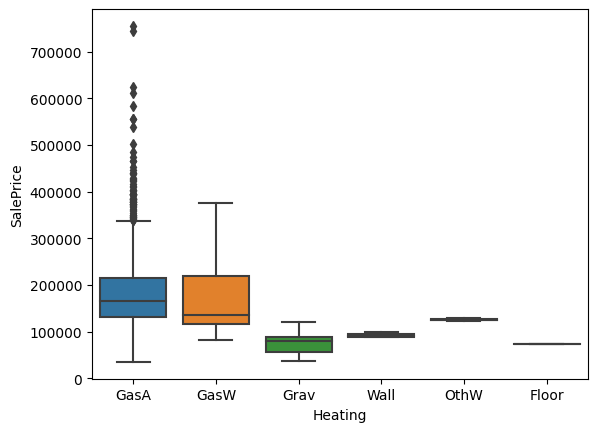

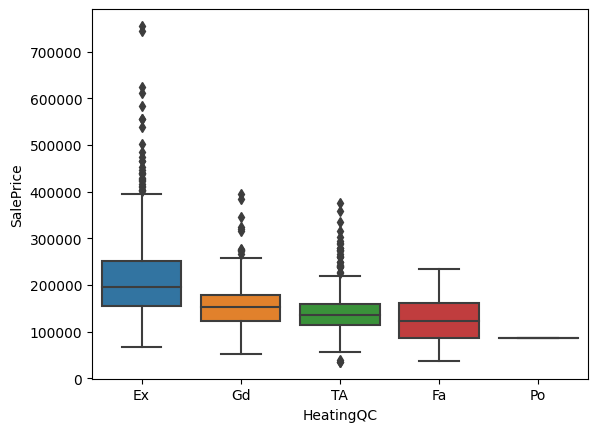

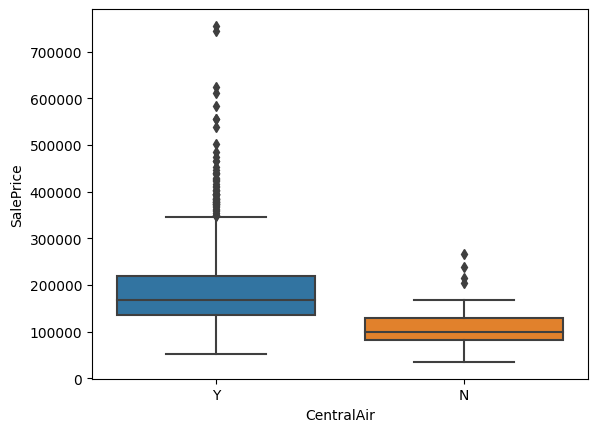

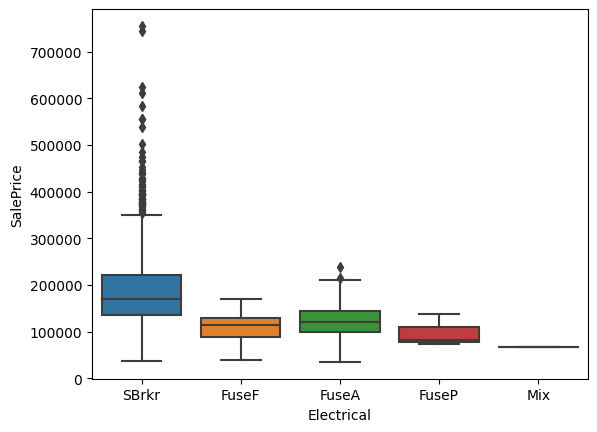

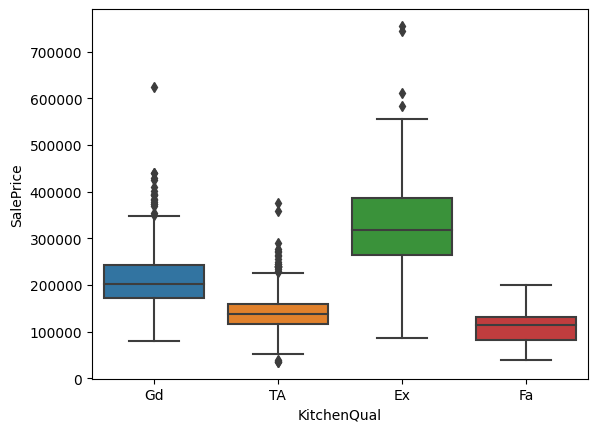

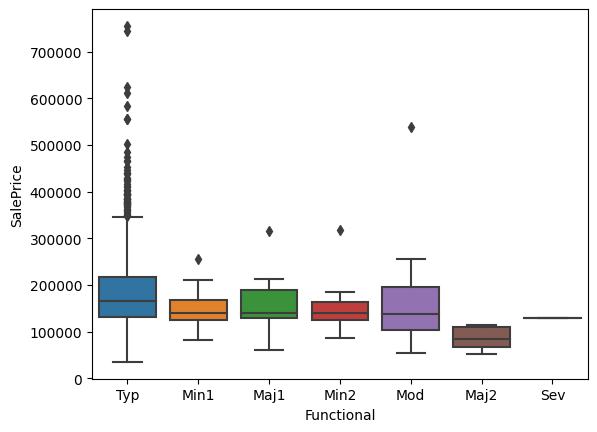

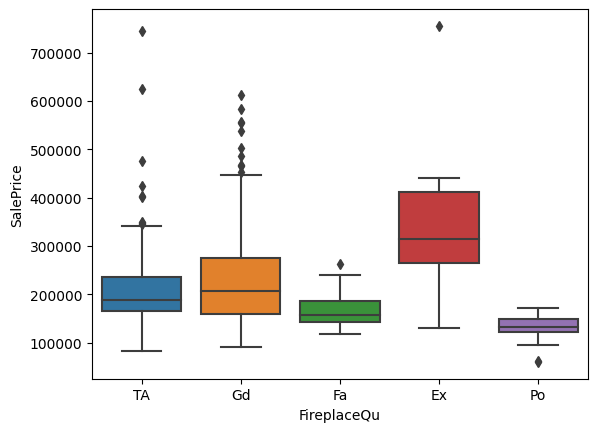

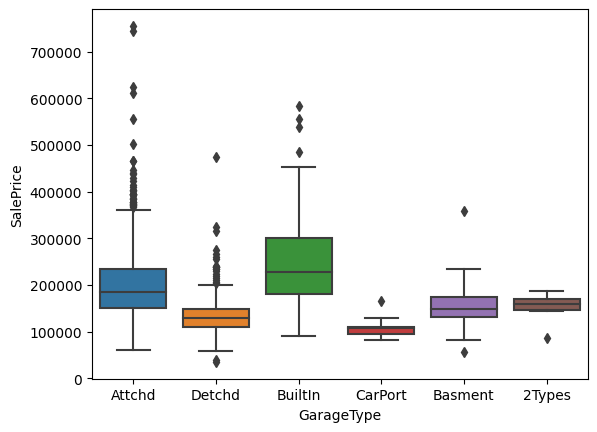

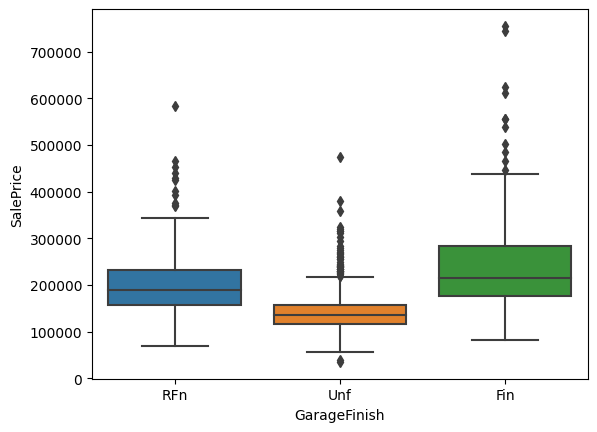

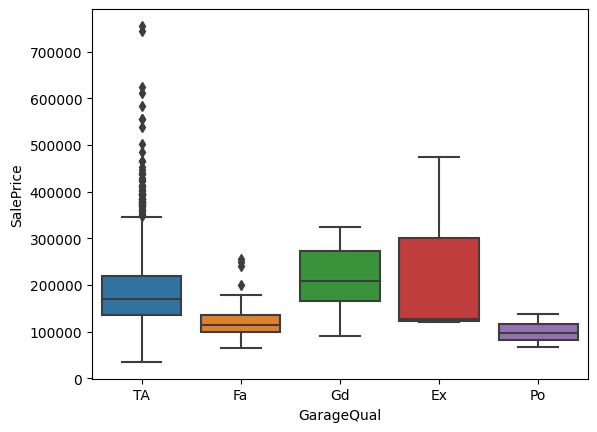

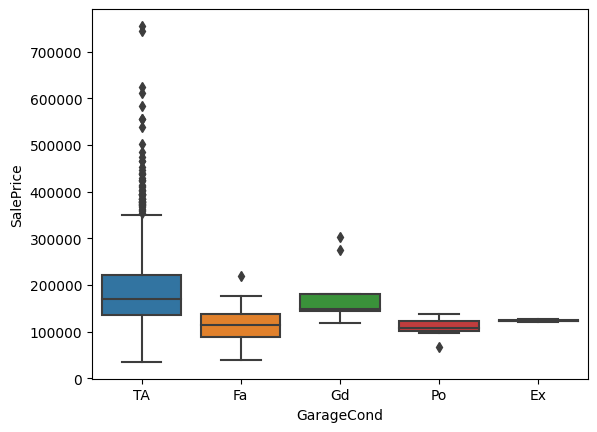

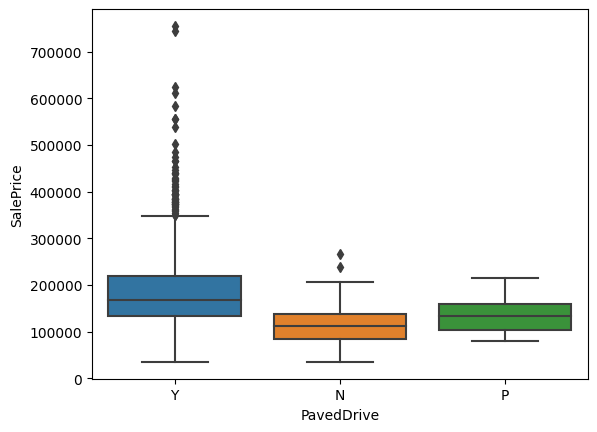

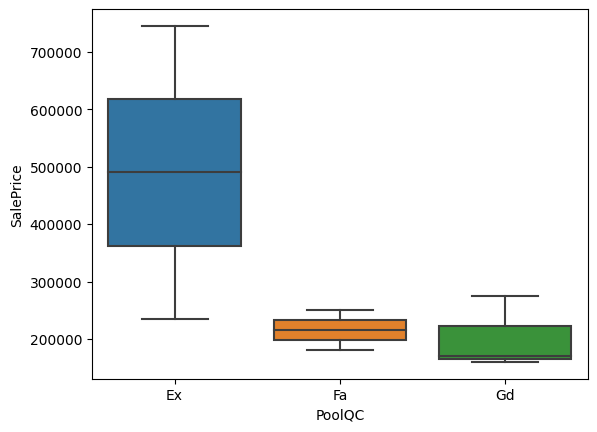

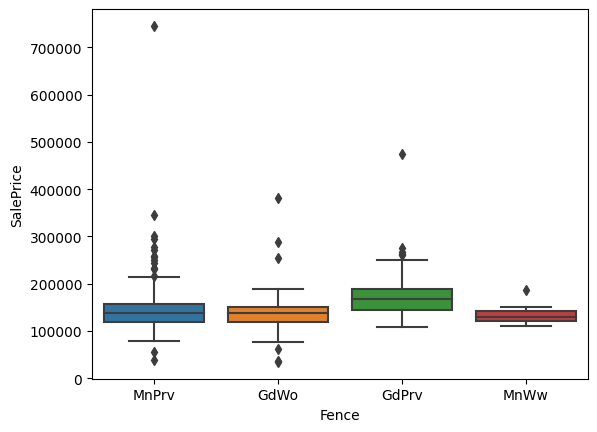

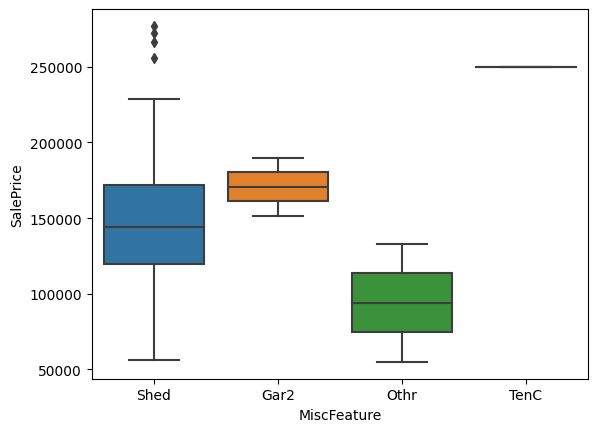

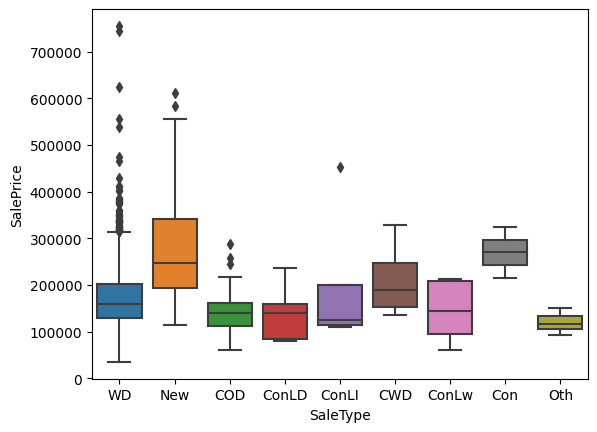

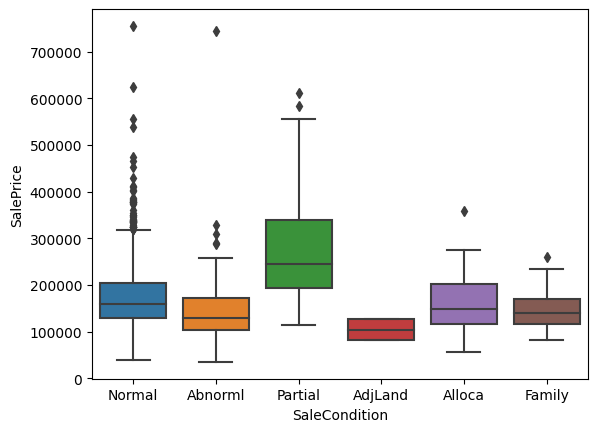

In [17]:
for i in cat:
    sns.boxplot(data=df, x=i, y='SalePrice')
    plt.show()

### Cat vs Cat - Crosstab

In [18]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
ctab = pd.crosstab(df['ExterQual'],df['ExterCond'])
ctab

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

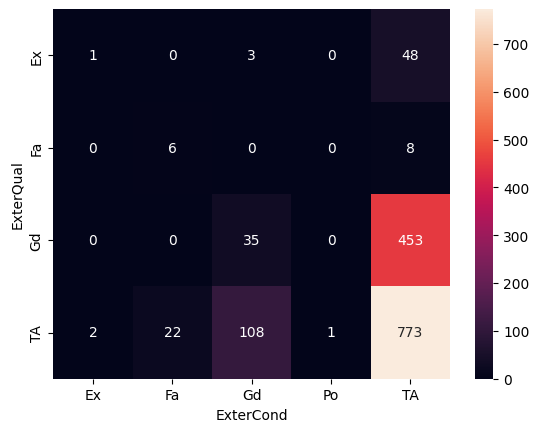

In [20]:
sns.heatmap(ctab, annot=True, fmt='d')

### Seperate X and Y

In [21]:
X = df.drop(columns=['Id','SalePrice'])
Y = df[['SalePrice']]

In [22]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [23]:
Y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

In [24]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

### Feature Selection Pipeline 
Cat - Ordinal Encoder

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [26]:
# Num pipe 1
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

# Cat Pipe 1
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='NotAvl')),
                            ('ordinal',OrdinalEncoder())])

# Combine
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat )])

In [27]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  1.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  1.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  1.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  3.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  1.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  1.        ,
         8.        ,  4.        ]])

In [28]:
cols = pre1.get_feature_names_out()
cols

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning',
       'cat__Street', 'cat__Alley', 'cat__LotShape', 'cat__LandContour',
       'cat__Utilities', 'cat__LotConfig', 'cat__LandSlope',
       'cat__Neighborhood', 'cat__Condition1', 'cat__Condition2',
       'cat__BldgTy

In [29]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0         0.073375         -0.220875     -0.207142          0.651479   
1        -0.872563          0.460320     -0.091886         -0.071836   
2         0.073375         -0.084636      0.073480          0.651479   
3         0.309859         -0.447940     -0.096897          0.651479   
4         0.073375          0.641972      0.375148          1.374795   

   num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0         -0.517200        1.050994           0.878668         0.514104   
1          2.179628        0.156734          -0.429577        -0.570750   
2         -0.517200        0.984752           0.830215         0.325915   
3         -0.517200       -1.863632          -0.720298        -0.570750   
4         -0.517200        0.951632           0.733308         1.366489   

   num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  cat__GarageFinish  \
0         0.575425        -0.288653  ...              1.0                2.0   
1         1.171992        -0.288653  ...              1.0                2.0   
2         0.092907        -0.288653  ...              1.0                2.0   
3        -0.499274        -0.288653  ...              5.0                3.0   
4         0.463568        -0.288653  ...              1.0                2.0   

   cat__GarageQual  cat__GarageCond  cat__PavedDrive  cat__PoolQC  cat__Fence  \
0              5.0              5.0              2.0          3.0         4.0   
1              5.0              5.0              2.0          3.0         4.0   
2              5.0              5.0              2.0          3.0         4.0   
3              5.0              5.0              2.0          3.0         4.0   
4              5.0              5.0              2.0          3.0         4.0   

   cat__MiscFeature  cat__SaleType  cat__SaleCondition  
0               1.0            8.0                 4.0  
1               1.0            8.0                 4.0  
2               1.0            8.0                 4.0  
3               1.0            8.0                 0.0  
4               1.0            8.0                 4.0  

[5 rows x 79 columns]

### Apply Feature selection method

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [31]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr,direction='backward')
sel_features = sel.fit_transform(X_pre, Y)

In [32]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__2ndFlrSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__EnclosedPorch', 'num__ScreenPorch', 'num__PoolArea',
       'cat__LandContour', 'cat__LandSlope', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__ExterQual',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__Electrical', 'cat__KitchenQual', 'cat__Functional',
       'cat__FireplaceQu', 'cat__GarageFinish', 'cat__GarageCond',
       'cat__PavedDrive', 'cat__Fence', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [33]:
len(sel_cols)

40

In [34]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [35]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [36]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [37]:
X_sel = X[imp_cols]
X_sel.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0          60     8450            7            5       2003       196.0   
1          20     9600            6            8       1976         0.0   
2          60    11250            7            5       2001       162.0   
3          70     9550            7            5       1915         0.0   
4          60    14260            8            5       2000       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Electrical  \
0         706           0        150          856  ...       SBrkr   
1         978           0        284         1262  ...       SBrkr   
2         486           0        434          920  ...       SBrkr   
3         216           0        540          756  ...       SBrkr   
4         655           0        490         1145  ...       SBrkr   

   KitchenQual  Functional  FireplaceQu  GarageFinish  GarageCond  PavedDrive  \
0           Gd         Typ          NaN           RFn          TA           Y   
1           TA         Typ           TA           RFn          TA           Y   
2           Gd         Typ           TA           RFn          TA           Y   
3           Gd         Typ           Gd           Unf          TA           Y   
4           Gd         Typ           TA           RFn          TA           Y   

   Fence  MiscFeature  SaleCondition  
0    NaN          NaN         Normal  
1    NaN          NaN         Normal  
2    NaN          NaN         Normal  
3    NaN          NaN        Abnorml  
4    NaN          NaN         Normal  

[5 rows x 40 columns]

### Seperate Cat and Con from selected features

In [38]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [39]:
cat_sel

['LandContour',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [40]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']

### Create a final pipeline for Model building
Cat - OneHotEncoder

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvl')),
                            ('Ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [43]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.07337496, -0.20714171,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.09188637, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.07347998,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08016039, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.05811155, -0.79515147, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
final_cols = pre2.get_feature_names_out()

In [45]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtFinSF1  num__BsmtFinSF2  \
0        1.050994         0.514104         0.575425        -0.288653   
1        0.156734        -0.570750         1.171992        -0.288653   
2        0.984752         0.325915         0.092907        -0.288653   
3       -1.863632        -0.570750        -0.499274        -0.288653   
4        0.951632         1.366489         0.463568        -0.288653   

   num__BsmtUnfSF  num__TotalBsmtSF  ...  cat__MiscFeature_NotAvl  \
0       -0.944591         -0.459303  ...                      1.0   
1       -0.641228          0.466465  ...                      1.0   
2       -0.301643         -0.313369  ...                      1.0   
3       -0.061670         -0.687324  ...                      1.0   
4       -0.174865          0.199680  ...                      1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         1.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        0.0                         0.0  
4                        1.0                         0.0  

[5 rows x 137 columns]

### Apply Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [47]:
xtrain.shape

(1168, 137)

In [48]:
xtest.shape

(292, 137)

### Create a base Linear Regression model

In [49]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [50]:
# R2 Score in training
model.score(xtrain, ytrain)

0.8875536659237776

In [51]:
# R2 Score in testing
model.score(xtest, ytest)

-357729325328221.44

### Ridge Model 

In [52]:
import numpy as np
alphas = np.arange(0.1, 100, 0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [53]:
params = {'alpha':alphas}

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [55]:
ridge = Ridge()
gscv1 = GridSearchCV(ridge, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [56]:
gscv1.best_params_

{'alpha': 25.800000000000004}

In [57]:
gscv1.best_score_

-1057268617.827157

In [58]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge(alpha=25.800000000000004)

In [59]:
# Check R2 Score in training
best_ridge.score(xtrain, ytrain)

0.8774618849204636

In [60]:
best_ridge.score(xtest, ytest)

0.8379367436349663

### Lasso Model

In [61]:
from sklearn.linear_model import Lasso

In [62]:
alphas2 = np.arange(120,135,0.1)
params2 = {'alpha':alphas2}

In [63]:
lasso = Lasso()
gscv2 = GridSearchCV(lasso, param_grid=params2, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([120. , 120.1, 120.2, 120.3, 120.4, 120.5, 120.6, 120.7, 120.8,
       120.9, 121. , 121.1, 121.2, 121.3, 121.4, 121.5, 121.6, 121.7,
       121.8, 121.9, 122. , 122.1, 122.2, 122.3, 122.4, 122.5, 122.6,
       122.7, 122.8, 122.9, 123. , 123.1, 123.2, 123.3, 123.4, 123.5,
       123.6, 123.7, 123.8, 123.9, 124. , 124.1, 124.2, 124.3, 124.4,
       124.5, 124.6, 124.7, 124....
       129. , 129.1, 129.2, 129.3, 129.4, 129.5, 129.6, 129.7, 129.8,
       129.9, 130. , 130.1, 130.2, 130.3, 130.4, 130.5, 130.6, 130.7,
       130.8, 130.9, 131. , 131.1, 131.2, 131.3, 131.4, 131.5, 131.6,
       131.7, 131.8, 131.9, 132. , 132.1, 132.2, 132.3, 132.4, 132.5,
       132.6, 132.7, 132.8, 132.9, 133. , 133.1, 133.2, 133.3, 133.4,
       133.5, 133.6, 133.7, 133.8, 133.9, 134. , 134.1, 134.2, 134.3,
       134.4, 134.5, 134.6, 134.7, 134.8, 134.9])},
             scoring='neg_mean_squared_error')

In [64]:
gscv2.best_params_

{'alpha': 134.89999999999915}

In [65]:
gscv2.best_score_

-1052077954.9082773

In [66]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=134.89999999999915)

In [67]:
# R2 Score in training
best_lasso.score(xtrain, ytrain)

0.8805530948864599

In [68]:
# R2 Score in testing
best_lasso.score(xtest, ytest)

0.8436450500527235

## Select Lasso model for final predictions

In [69]:
from functions_4pm import evaluate_model

In [87]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_lasso)

Training Results :

MSE : 739247999.51
RMSE: 27189.12
MAE : 16324.43
R2  : 0.8806


Testing Results :

MSE : 1059666275.89
RMSE: 32552.52
MAE : 17294.09
R2  : 0.8436


### Predicting train and test data

In [88]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [89]:
ypred_tr[0:5]

array([[ 60544.],
       [119552.],
       [161416.],
       [214864.],
       [214240.]])

In [90]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [91]:
ypred_ts[0:5]

array([[163936.],
       [200304.],
       [227224.],
       [208552.],
       [ 90728.]])

In [92]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

### Predicting Sample_set.csv

In [93]:
xnew = pd.read_csv('sample_set.csv')
xnew.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [94]:
xnew.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [95]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[-0.87256276,  0.11076257, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.37584985, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.33205282, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87256276,  0.95042275, -0.79515147, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66458604, -0.00759964, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08918038,  0.65147924, ...,  0.        ,
         1.        ,  0.        ]])

In [96]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0        -0.872563      0.110763         -0.795151          0.381743   
1        -0.872563      0.375850         -0.071836          0.381743   
2         0.073375      0.332053         -0.795151         -0.517200   
3         0.073375     -0.054002         -0.071836          0.381743   
4         1.492282     -0.552407          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtFinSF1  num__BsmtFinSF2  \
0       -0.340077        -0.570750         0.053428         0.604293   
1       -0.439440         0.027027         1.051363        -0.288653   
2        0.852269        -0.570750         0.761852        -0.288653   
3        0.885390        -0.460051         0.347326        -0.288653   
4        0.686666        -0.570750        -0.396190        -0.288653   

   num__BsmtUnfSF  num__TotalBsmtSF  ...  cat__MiscFeature_NotAvl  \
0       -0.672923         -0.400017  ...                      1.0   
1       -0.365032          0.619239  ...                      0.0   
2       -0.974021         -0.295127  ...                      1.0   
3       -0.550672         -0.299687  ...                      1.0   
4        1.018211          0.507509  ...                      1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        1.0                         0.0  
4                        1.0                         0.0  

[5 rows x 137 columns]

In [97]:
preds = best_ridge.predict(xnew_pre)
preds

array([[118974.39559385],
       [153925.07628217],
       [168201.44260419],
       ...,
       [170397.88318231],
       [108183.22197959],
       [240589.10617161]])

### Create a results dataframe

In [98]:
df_res = xnew[['Id']]
df_res

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [99]:
df_res['SalePrice']=preds

In [100]:
df_res

Id      SalePrice
0     1461  118974.395594
1     1462  153925.076282
2     1463  168201.442604
3     1464  186431.088183
4     1465  192392.129293
...    ...            ...
1454  2915   78508.591489
1455  2916   71757.367124
1456  2917  170397.883182
1457  2918  108183.221980
1458  2919  240589.106172

[1459 rows x 2 columns]

<Axes: xlabel='SalePrice', ylabel='Count'>

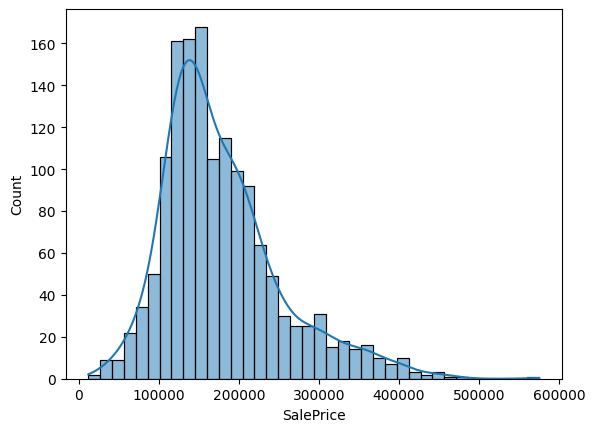

In [101]:
sns.histplot(data=df_res, x='SalePrice',kde=True)

### Save results to csv

In [102]:
df_res.to_csv('Prediction.csv',index=False)

In [103]:
df_res.describe().T

count           mean           std           min            25%  \
Id         1459.0    2190.000000    421.321334   1461.000000    1825.500000   
SalePrice  1459.0  178797.041423  74513.941819  12071.004698  127964.789345   

                     50%           75%            max  
Id           2190.000000    2554.50000    2919.000000  
SalePrice  161369.149291  212614.12333  575392.004168